// Result for BODY_25 (25 body parts consisting of COCO + foot)
// const std::map<unsigned int, std::string> POSE_BODY_25_BODY_PARTS {
//     {0,  "Nose"},
//     {1,  "Neck"},
//     {2,  "RShoulder"},
//     {3,  "RElbow"},
//     {4,  "RWrist"},
//     {5,  "LShoulder"},
//     {6,  "LElbow"},
//     {7,  "LWrist"},
//     {8,  "MidHip"},
//     {9,  "RHip"},
//     {10, "RKnee"},
//     {11, "RAnkle"},
//     {12, "LHip"},
//     {13, "LKnee"},
//     {14, "LAnkle"},
//     {15, "REye"},
//     {16, "LEye"},
//     {17, "REar"},
//     {18, "LEar"},
//     {19, "LBigToe"},
//     {20, "LSmallToe"},
//     {21, "LHeel"},
//     {22, "RBigToe"},
//     {23, "RSmallToe"},
//     {24, "RHeel"},
//     {25, "Background"}

** x-coord is horizontal axis

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

%matplotlib inline
# sns.set_context('paper', font_scale=1.5)

import os, glob
from pathlib import Path
from scipy import stats, interpolate, signal
from scipy.signal import welch, butter
from HelperFcns import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#for interactive plots
%matplotlib notebook

In [3]:
datapath = Path('C:/openpose/output/')

In [4]:
os.listdir(datapath)

['1004', '1009', '1023', '1039', '1043', '1044', '1052', '1054', '1056']

## Process multiple users / task

In [4]:
df = pd.DataFrame()

for subj in os.listdir(datapath): #loop through subjects
    filepath = datapath / subj
    posefiles = os.listdir(filepath)
    tasks = [p.split('_')[0] for p in posefiles]; cycles = [c.split('_')[1] for c in posefiles]
    tasks = np.unique(tasks); cycles = np.unique(cycles)
#     print(subj, tasks, cycles)
    
    for task in tasks:
        for cycle in cycles:
            print(subj, task, cycle)        
            posefiles = glob.glob((filepath / (task+'_'+str(cycle))).as_posix()+'*')
            posefiles = [Path(p) for p in posefiles] 
            
            if len(posefiles) > 0:
                print(posefiles[0])
            
                for file in posefiles:
                    with open(file) as f:
                        try:
                            data = json.load(f)
                        except(UnicodeDecodeError):
                            print('cannot parse ',str(file))

                    person = 0 #for now use first person detected (need to be updated)
                    
                    #frame nr
                    str1 = file.as_posix()
                    match = re.search(r'\d+_keypoints',str1)
                    if match:                        
                        frame_nr = int(re.findall('\d+',match.group())[0])
                    else:
                        print('missing frame')
                        frame_nr = -1

                    pose = data['people'][person]['pose_keypoints_2d']
                    pose_hand_L = data['people'][person]['hand_left_keypoints_2d']
                    pose_hand_R = data['people'][person]['hand_right_keypoints_2d']
                    d = {'SubjID':subj, 'Task':task, 'cycle':cycle,
                         'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
                         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23],
                         'nose_x':pose[0], 'nose_y':pose[1], 'nose_c':pose[2], 'neck_x':pose[3], 'neck_y':pose[4], 'neck_c':pose[5],
                         'midHip_x':pose[24], 'midHip_y':pose[25], 'midHip_c':pose[26],
                         'thumbR_x':pose_hand_R[12], 'thumbR_y':pose_hand_R[13], 'thumbR_c':pose_hand_R[14],
                         'indexR_x':pose_hand_R[24], 'indexR_y':pose_hand_R[25], 'indexR_c':pose_hand_R[26],
                         'thumbL_x':pose_hand_L[12], 'thumbL_y':pose_hand_L[13], 'thumbL_c':pose_hand_L[14],
                         'indexL_x':pose_hand_L[24], 'indexL_y':pose_hand_L[25], 'indexL_c':pose_hand_L[26],                         
                         'Npeople':len(data['people'])
                }
                    df = pd.concat((df,pd.DataFrame(d, index=[frame_nr])))
            else:
                print('No pose files found')
                
df['SubjID']=df.SubjID.astype(int)
df['cycle']=df.cycle.astype(int)

#save data
df.to_csv('../Metadata/Poses.csv',index=True)

1004 FtnL 1
C:\openpose\output\1004\FtnL_1_000000000000_keypoints.json
1004 FtnL 3
C:\openpose\output\1004\FtnL_3_000000000000_keypoints.json
1004 FtnR 1
C:\openpose\output\1004\FtnR_1_000000000000_keypoints.json
1004 FtnR 3
C:\openpose\output\1004\FtnR_3_000000000000_keypoints.json
1004 RamL 1
C:\openpose\output\1004\RamL_1_000000000000_keypoints.json
1004 RamL 3
C:\openpose\output\1004\RamL_3_000000000000_keypoints.json
1004 RamR 1
C:\openpose\output\1004\RamR_1_000000000000_keypoints.json
1004 RamR 3
No pose files found
1004 SitStand 1
C:\openpose\output\1004\SitStand_1_000000000000_keypoints.json
1004 SitStand 3
C:\openpose\output\1004\SitStand_3_000000000000_keypoints.json
1009 FtnL 1
C:\openpose\output\1009\FtnL_1_000000000000_keypoints.json
1009 FtnL 3
C:\openpose\output\1009\FtnL_3_000000000000_keypoints.json
1009 FtnR 1
C:\openpose\output\1009\FtnR_1_000000000000_keypoints.json
1009 FtnR 3
C:\openpose\output\1009\FtnR_3_000000000000_keypoints.json
1009 RamL 1
C:\openpose\outpu

IndexError: list index out of range

In [36]:
#load data
# df = pd.read_csv('../Metadata/Poses.csv')
df = pd.read_csv('/Users/luca/Box/CISPD_Videos_proc/Metadata/Poses.csv')
df.rename(columns={'Unnamed: 0':'frame#'}, inplace=True)
df.set_index(df['frame#'], inplace=True)
df.drop(['frame#'], axis=1, inplace=True)
df.head()

SubjID  Task  cycle   elbR_x   elbR_y    elbR_c   wriR_x   wriR_y  \
frame#                                                                      
0         1004  FtnL      1  329.352  329.357  0.899764  360.768  385.545   
1         1004  FtnL      1  329.346  328.036  0.889666  360.735  381.679   
2         1004  FtnL      1  329.380  324.163  0.856091  360.758  380.347   
3         1004  FtnL      1  329.406  318.941  0.898018  360.764  376.411   
4         1004  FtnL      1  329.426  313.724  0.841354  360.779  371.164   

          wriR_c   elbL_x   ...     indexR_x  indexR_y  indexR_c  thumbL_x  \
frame#                      ...                                              
0       0.824514  463.882   ...      382.909   434.640  0.861225   542.777   
1       0.862279  465.103   ...      381.813   432.987  0.883224   534.912   
2       0.878291  465.108   ...      381.377   429.680  0.884750   534.644   
3       0.820703  465.154   ...      381.085   425.569  0.853273   534.341   
4       0.881449  465.153   ...      381.580   420.072  0.826076   529.243   

        thumbL_y  thumbL_c  indexL_x  indexL_y  indexL_c  Npeople  
frame#                                                             
0        236.062  0.155607   545.704   240.565  0.093997        3  
1        256.269  0.369207   540.038   254.486  0.064129        3  
2        254.132  0.374593   542.145   250.722  0.113782        3  
3        248.438  0.511668   540.824   247.321  0.435721        3  
4        245.872  0.426455   539.982   243.587  0.102082        3  

[5 rows x 37 columns]

In [66]:
# df[df.SubjID==1054]

In [4]:
# tasks = df.Task.unique()
tasks = ['FtnL', 'FtnR', 'RamL', 'RamR', 'SitStand']

In [27]:
scores = pd.read_csv('/Users/luca/Box/CISPD_Videos_proc/Metadata/Table4.csv')
scores = scores.loc[(scores['SubjID'].isin(df.SubjID.unique())) & (scores.TaskAbb.isin(tasks))]
scores = scores[['SubjID','Visit','TaskAbb','Tremor - Left', 'Tremor - Right', 'Bradykinesia - Right', 'Bradykinesia - Left']]
scores.query('Visit != "1 Month"', inplace=True)
scores['Visit']=scores.Visit.apply(lambda x: x.split()[-1])
for i,j in enumerate(scores.Visit.unique()):
    print(i,j)
    scores.loc[scores.Visit==j, 'Visit'] = i+1

scores = scores.query('Visit ==1 | Visit ==2 | Visit==3')
    
scores.head(2)

0 0
1 30
2 60
3 90
4 120
5 150


SubjID  Visit TaskAbb  Tremor - Left  Tremor - Right  \
108    1004      1    FtnL            1.0             0.0   
109    1004      1    FtnR            0.0             1.0   

     Bradykinesia - Right  Bradykinesia - Left  
108                   NaN                  1.0  
109                   1.0                  NaN

In [28]:
scores.Visit.unique()

array([1, 2, 3])

In [29]:
#subjects with severe symptoms
PD = scores.loc[(scores['Tremor - Left']>2) | (scores['Tremor - Right']>2) | 
           (scores['Bradykinesia - Left']>2) | (scores['Bradykinesia - Right']>2)]

noPD = scores.loc[(scores['Tremor - Left']==0) & (scores['Tremor - Right']==0) | 
           (scores['Bradykinesia - Left']==0) & (scores['Bradykinesia - Right']==0)]

PDsubj = PD.SubjID.unique()
noPDsubj = noPD.SubjID.unique()
print('high symptoms',PDsubj, '\nno symptoms',noPDsubj)

high symptoms [1043 1054 1056] 
no symptoms [1004 1009 1023 1039 1043 1044 1052 1054]


In [30]:
#all subjects with severe symptoms
print(PD[['SubjID','TaskAbb','Visit']])

      SubjID   TaskAbb  Visit
1668    1043      FtnL      1
1669    1043      FtnR      1
1671    1043      RamL      1
1672    1043      RamR      1
2691    1054      RamL      1
2706    1054      RamL      2
2886    1056      RamL      2
2899    1056      FtnR      3
2901    1056      RamL      3
2902    1056      RamR      3
2905    1056  SitStand      3


In [17]:
#all subjects with high symptoms
# print(noPD[['SubjID','TaskAbb','Visit']])

In [31]:
(PD[PD.TaskAbb == 'FtnR'])

SubjID  Visit TaskAbb  Tremor - Left  Tremor - Right  \
1669    1043      1    FtnR            2.0             1.0   
2899    1056      3    FtnR            3.0             2.0   

      Bradykinesia - Right  Bradykinesia - Left  
1669                   3.0                  NaN  
2899                   1.0                  NaN

In [56]:
scores.query('SubjID==1056 & TaskAbb=="FtnR"')

SubjID  Visit TaskAbb  Tremor - Left  Tremor - Right  \
2869    1056      1    FtnR            0.0             2.0   
2884    1056      2    FtnR            2.0             2.0   
2899    1056      3    FtnR            3.0             2.0   

      Bradykinesia - Right  Bradykinesia - Left  
2869                   1.0                  NaN  
2884                   1.0                  NaN  
2899                   1.0                  NaN

In [57]:
scores.query('SubjID==1054 & TaskAbb=="FtnR"')

SubjID  Visit TaskAbb  Tremor - Left  Tremor - Right  \
2689    1054      1    FtnR            0.0             1.0   
2704    1054      2    FtnR            0.0             0.0   
2719    1054      3    FtnR            0.0             0.0   

      Bradykinesia - Right  Bradykinesia - Left  
2689                   2.0                  NaN  
2704                   1.0                  NaN  
2719                   0.0                  NaN

In [9]:
noPD.loc[(noPD.SubjID.isin(PDsubj)) & (noPD.TaskAbb=='FtnR')]

SubjID  Visit TaskAbb  Tremor - Left  Tremor - Right  \
1699    1043      3    FtnR            0.0             0.0   
2719    1054      3    FtnR            0.0             0.0   

      Bradykinesia - Right  Bradykinesia - Left  
1699                   0.0                  NaN  
2719                   0.0                  NaN

In [4]:
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
bodyparts
for b in bodyparts:
    print(b, df[b].min(), df[b].max())

elbR_x 0.0 1801.83
elbR_y 0.0 1074.89
wriR_x 0.0 1751.78
wriR_y 0.0 1074.88
elbL_x 0.0 1851.85
elbL_y 0.0 1074.88
wriL_x 0.0 1607.43
wriL_y 0.0 1048.27
thumbR_x 0.0 1733.31
thumbR_y 0.0 1205.05
indexR_x 0.0 1739.38
indexR_y -10.8863 1182.62
thumbL_x 0.0 1543.89
thumbL_y 0.0 1159.17
indexL_x 0.0 1563.14
indexL_y -22.5093 1105.52


# Plot FTNR tasks for all users

In [298]:
# s = '1004'
# dfs = df.query('SubjID == @s & Task=="FtnR"')

# #remove outliers 
# L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length
# sns.distplot(L)
# z = np.abs(stats.zscore(L)) 
# # plt.hist(z)
# # plt.hist(L[z<3]) #remove outliers
# # sns.plot()
# # plt.hist(z)

# # L.plot(kind='box')

In [98]:
# wriR = np.sqrt(dfs.wriR_x**2 + dfs.wriR_y**2)
# wriL = np.sqrt(dfs.wriL_x**2 + dfs.wriL_y**2)
# indexR = np.sqrt(dfs.indexR_x**2 + dfs.indexR_y**2)
# indexL = np.sqrt(dfs.indexL_x**2 + dfs.indexL_y**2)
# thumbR = np.sqrt(dfs.thumbR_x**2 + dfs.thumbR_y**2)
# thumbL = np.sqrt(dfs.thumbL_x**2 + dfs.thumbL_y**2)

In [ ]:
joints = ['wriL_c', 'wriR_c', 'indexR_c', 'indexL_c', 'elbR_c', 'elbL_c']
plt.figure(figsize=(8,4))
for j in joints:
    plt.axvline(df[j].median(), c='k')
    sns.distplot(df[j])
plt.legend(joints)
plt.grid()

### Example interpolations

In [62]:
s = 1039
task = 'FtnR'
dfs = df.query('SubjID == @s & Task==@task & cycle==1').copy()    
dfs.head()

SubjID  Task  cycle   elbR_x   elbR_y    elbR_c   wriR_x   wriR_y  \
frame#                                                                      
0         1039  FtnR      1  478.480  358.994  0.797348  525.570  229.729   
1         1039  FtnR      1  478.486  357.074  0.800886  523.652  233.654   
2         1039  FtnR      1  478.467  359.033  0.783948  525.491  229.708   
3         1039  FtnR      1  476.619  366.820  0.828108  523.598  233.623   
4         1039  FtnR      1  474.582  370.829  0.781156  523.604  237.525   

          wriR_c   elbL_x   ...     indexR_x  indexR_y  indexR_c  thumbL_x  \
frame#                      ...                                              
0       0.680100  852.796   ...      577.560   127.070  0.021344   879.506   
1       0.668485  852.781   ...      578.198   124.892  0.102711   880.087   
2       0.700551  852.775   ...      578.589   122.528  0.227421   880.106   
3       0.659416  854.605   ...      577.098   164.337  0.077380   879.483   
4       0.667091  854.635   ...      580.306   168.061  0.334225   879.499   

        thumbL_y  thumbL_c  indexL_x  indexL_y  indexL_c  Npeople  
frame#                                                             
0        589.988  0.891463   894.222   606.624  0.317066        1  
1        589.968  0.897191   896.082   605.963  0.338106        1  
2        589.970  0.890138   896.102   604.687  0.318786        1  
3        590.203  0.886530   895.054   604.476  0.335825        1  
4        590.243  0.889255   895.073   605.818  0.317857        1  

[5 rows x 37 columns]

In [74]:
data = dfs.copy()
jj = 'wriL_'
print(len(data))
#remove missed detections (0s in both coords) for current joint
data = data[ (data[jj+'x'] > 0) & (data[jj+'y'] > 0)]
print(len(data))
#normalization factor (hip length)    
L = (np.sqrt( (data.midHip_x -data.neck_x)**2 + (data.midHip_y-data.neck_y)**2) ) #trunk length (ref length)            
p = (np.sqrt((data[jj+'x'] - data.nose_x)**2 + (data[jj+'y'] - data.nose_y)**2))/L 
data[jj] = p 

480
480


In [106]:
# Sz = stats.zscore(L)
# Snew = L.copy()
# Snew[np.abs(Sz)>2] = np.nan
# Snew = Snew.interpolate()
# Snew.interpolate('nearest')

In [134]:
data = dfs.copy()
jj = 'wriR_'

#remove missed detections (0s in both coords) for current joint
data = data[ (data[jj+'x'] > 0) & (data[jj+'y'] > 0)]

#normalization factor (hip length)    
L = (np.sqrt( (data.midHip_x -data.neck_x)**2 + (data.midHip_y-data.neck_y)**2) ) #trunk length (ref length)            
L = removeOutliers(L,2) #remove outliers and linearly interpolate

#Detrend data: distance from nose (ref point) normalized by trunk length
p = (np.sqrt((data[jj+'x'] - data.nose_x)**2 + (data[jj+'y'] - data.nose_y)**2))/L 
data[jj] = p 
data.dropna(inplace=True)
data.head()
#             data[jj] = stats.zscore(p)             #z-score data

#outlier rejection
data[jj] = removeOutliers(data[jj],2)
#             data = data[np.abs(data[jj]) < d_threshold] 

#filter 
data[jj+'filt'] = signal.savgol_filter(data[jj], 13, 2)



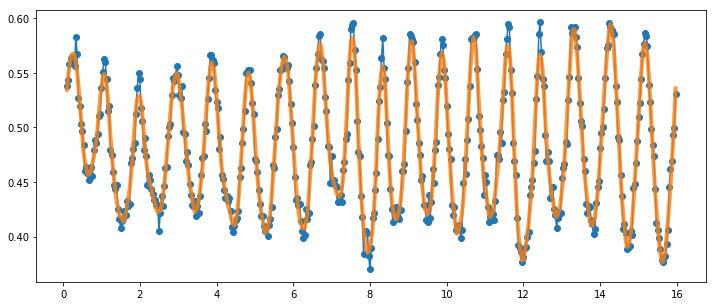

In [135]:
plt.figure(figsize=(12,5))
plt.plot(data[jj].index/30, data[jj].values, 'o-')
# #apply filter
plt.plot(data.index.values/30, signal.savgol_filter(data[jj], 13, 2), '-', LineWidth=4, alpha=0.8, label='SavGol filter')


In [24]:
# data[jj].isnull()

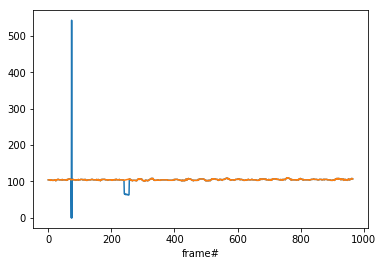

In [88]:
Lnew = removeOutliers(L,2)
L.plot()
Lnew.plot()

In [54]:
joints = [ 'elbL_', 'elbR_', 'wriL_', 'wriR_', 'thumbL_', 'thumbR_','indexL_', 'indexR_',]
for j in joints:
    dfs = dfs[ (dfs[j+'x'] > 0) & (dfs[j+'y'] > 0)]

<IPython.core.display.Javascript object>


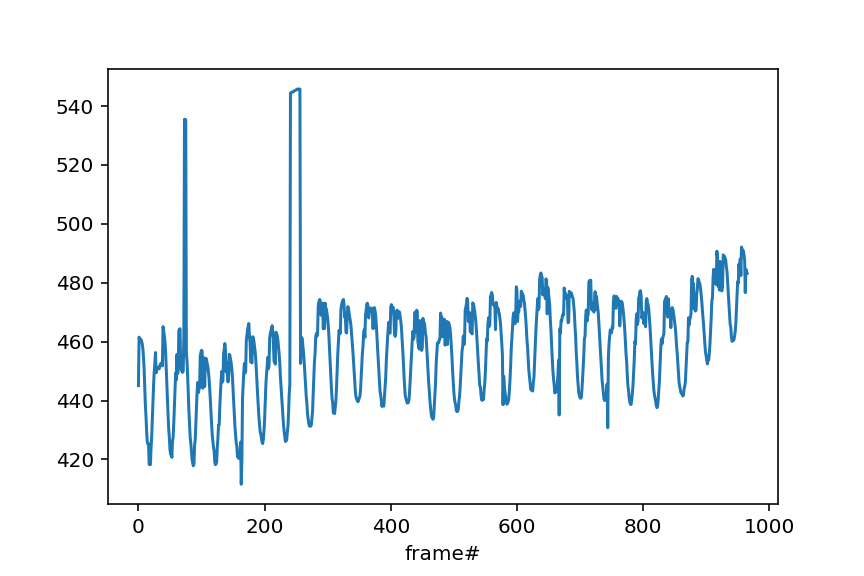

In [59]:
dfs.indexR_x.plot() #remove 0s as non detections

In [211]:
#x is horizontal 
print(dfs.midHip_x.mean(), dfs.neck_x.mean())
print(dfs.midHip_y.mean(), dfs.neck_y.mean())

937.2092989864872 884.9413902027021
772.9071250000001 399.5755489864863


<IPython.core.display.Javascript object>


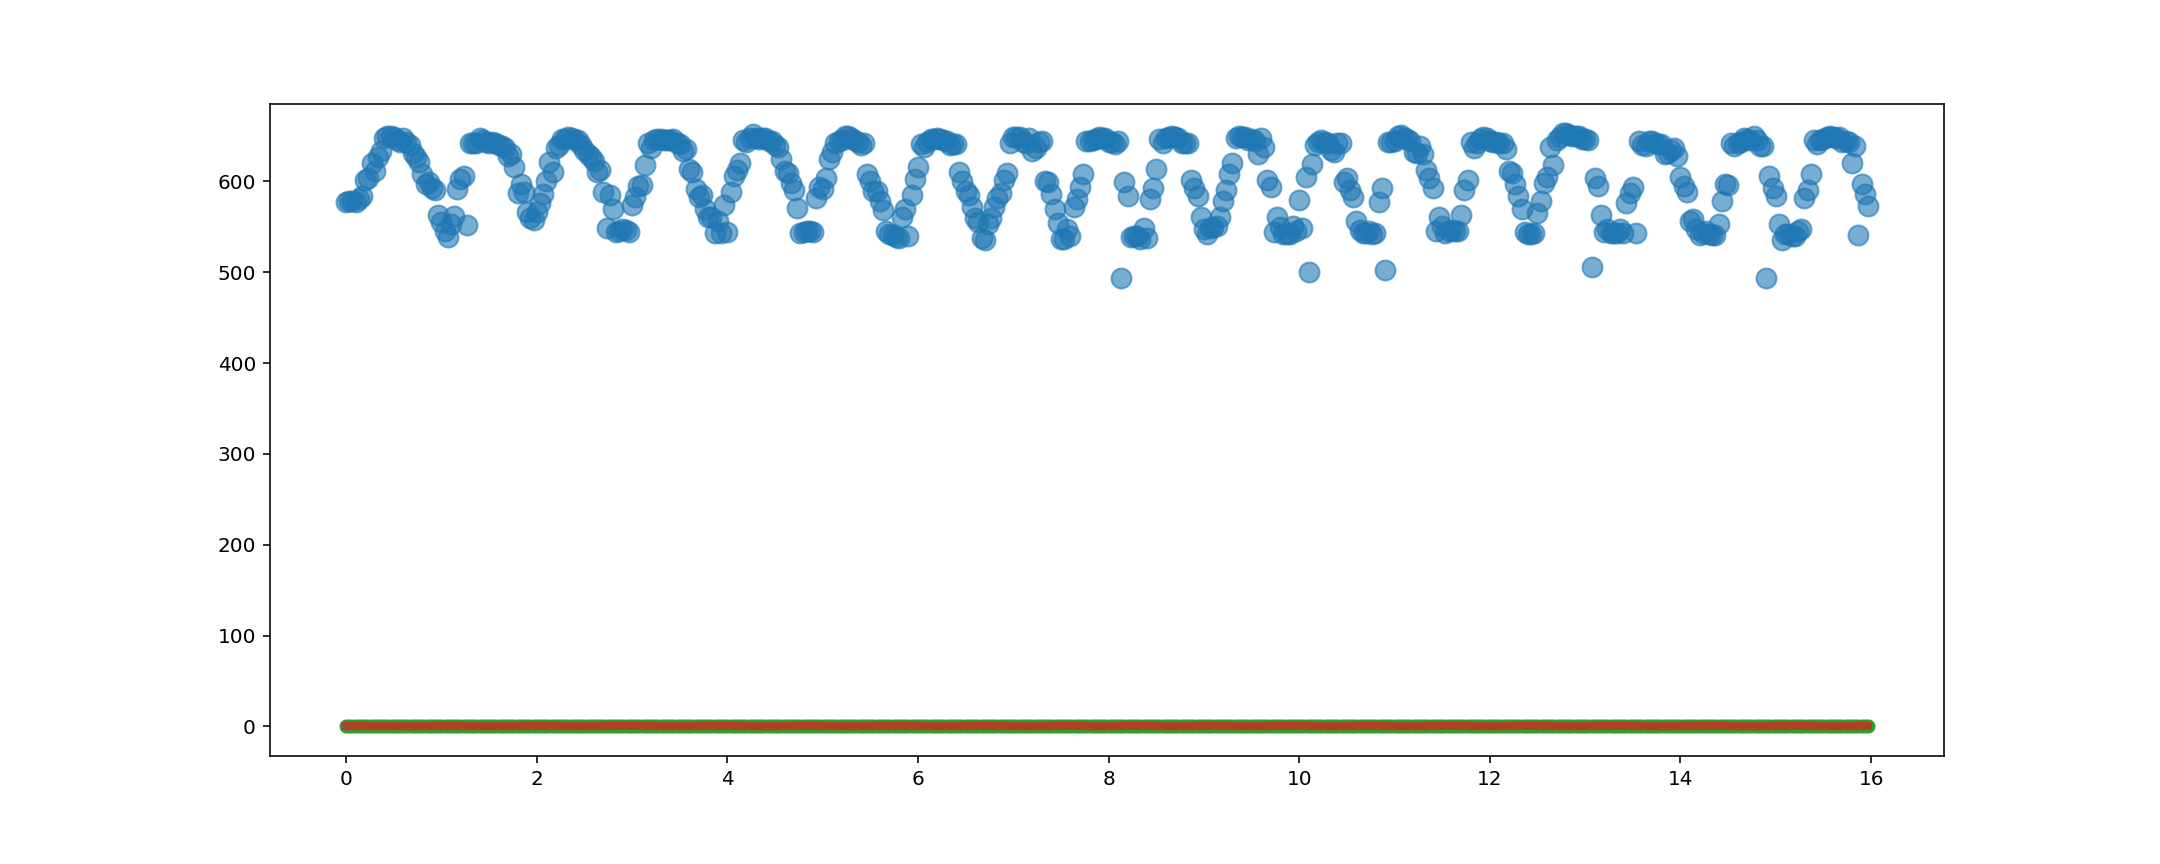

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [58]:
z = dfs.indexR_x
# z = stats.zscore(dfs.indexR_x)
dfs['indexR_z'] = z
data = dfs[['indexR_z']].copy()
plt.figure(figsize=(15,6))
plt.plot(data.index.values/30, data['indexR_z'], 'o', Markersize=10, alpha=0.6, LineWidth=2, label='original')

#remove outliers
data = data[np.abs(data['indexR_z']) <2]
plt.plot(data.index.values/30, data['indexR_z'], '-', LineWidth=1, alpha=0.6, label='outlier removed')

# #apply filter
plt.plot(data.index.values/30, signal.savgol_filter(data['indexR_z'], 13, 2), '-', LineWidth=4, alpha=0.8, label='SavGol filter')

# plt.plot(data.index.values/30, signal.medfilt(data['indexR_z'], 13), '-', LineWidth=4, alpha=0.7, label='median filter')

plt.legend()
plt.grid()

In [43]:
def plot_joint_trajectory_norm(df, task='FtnR', subjs='All', cycle=1, size=8, colormap=False):
    
    markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
    joints = ['wriL_', 'wriR_', 'thumbL_', 'thumbR_','indexL_', 'indexR_',]
    p_joints = {} #trajectory for each joint (relative to reference point)
    frame_rate = 30 #pretty much the same across movies
    
    T = 20 #end plot time [s]
    d_threshold = 2 #max distance (from nose) above which a pose is discarded  
        
    if subjs == 'All':
        subjs = df.SubjID.unique()
        
    fig, ax = plt.subplots(3,2, sharex=True, figsize=(12,12))
    ax = ax.ravel()
    
    for si, s in enumerate(subjs):

        dfs = df.query('SubjID == @s & Task==@task & cycle==@cycle').copy()    
        dfs = dfs[:int(T*frame_rate)]
                        
        for i, jj in enumerate(joints):
            
            data = dfs.copy()
            #remove missed detections (0s in both coords) for current joint
            data = data[ (data[jj+'x'] > 0) & (data[jj+'y'] > 0)]
            
            #normalization factor (hip length)    
            L = (np.sqrt( (data.midHip_x -data.neck_x)**2 + (data.midHip_y-data.neck_y)**2) ) #trunk length (ref length)            
            L = removeOutliers(L,2) #remove outliers and linearly interpolate
                        
            #Detrend data: distance from nose (ref point) normalized by trunk length
            p = (np.sqrt((data[jj+'x'] - data.nose_x)**2 + (data[jj+'y'] - data.nose_y)**2))/L 
            data[jj] = p 

            #outlier rejection
            data[jj] = removeOutliers(data[jj],2)
            data.dropna(inplace=True)
#             data[jj] = stats.zscore(data[jj])             #z-score data

#             data = data[np.abs(data[jj]) < d_threshold] 
        
            #filter 
            try:
                data[jj+'filt'] = signal.savgol_filter(data[jj], 13, 2)
            except:
                print('error fitting filter on ', s, jj, len(data[jj]))
                data[jj+'filt'] = data[jj]
                        
            t = data.index/frame_rate
            if colormap == False:
                ax[i].scatter(t, data[jj], s=size, alpha=0.6); 
#                 ax[i].plot(t, data[jj], LineWidth=.5)
                ax[i].plot(t, data[jj+'filt'], LineWidth=2)
            else:
                ax[i].scatter(t, data[jj], s=size, alpha=0.6, c=data[jj+'c'], cmap='cool', marker=markers[si], vmin=0, vmax=1); 
#                 ax[i].plot(t, data[jj], LineWidth=.5)
                ax[i].plot(t, data[jj+'filt'], LineWidth=2)
                
            ax[i].set_title(jj+task+str(cycle))
            p_joints.update({jj:p})    
                    
    for i in range(len(joints)):
        ax[i].grid()
        ax[i].legend(subjs)
        

## Ftn

error fitting filter on  1052 wriL_ 0
error fitting filter on  1052 wriR_ 0
error fitting filter on  1052 thumbL_ 0
error fitting filter on  1052 thumbR_ 0
error fitting filter on  1052 indexL_ 0
error fitting filter on  1052 indexR_ 0
error fitting filter on  1054 wriL_ 0
error fitting filter on  1054 wriR_ 0
error fitting filter on  1054 thumbL_ 0
error fitting filter on  1054 thumbR_ 0
error fitting filter on  1054 indexL_ 0
error fitting filter on  1054 indexR_ 0


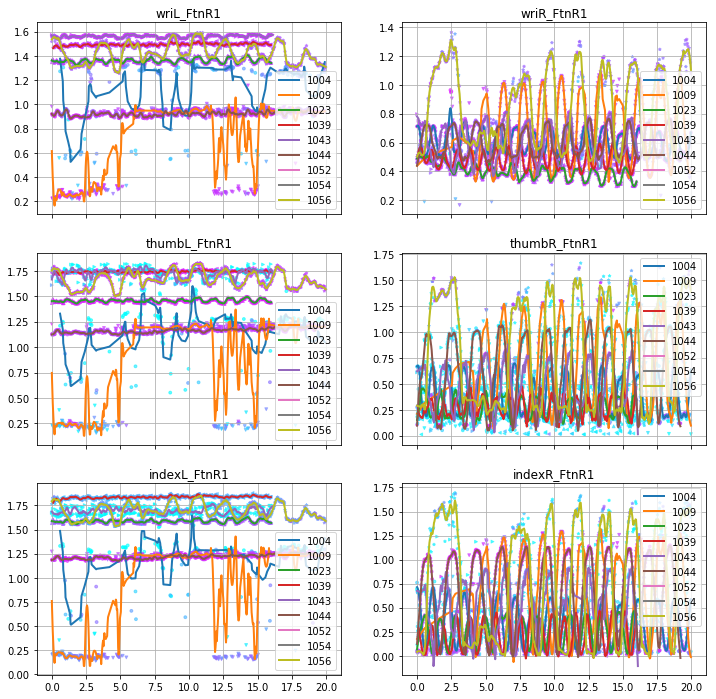

In [157]:

plot_joint_trajectory_norm(df, 'FtnR', colormap=True)
# plt.savefig('../Figs/FtnR1_All.jpg', dpi=300)

<IPython.core.display.Javascript object>


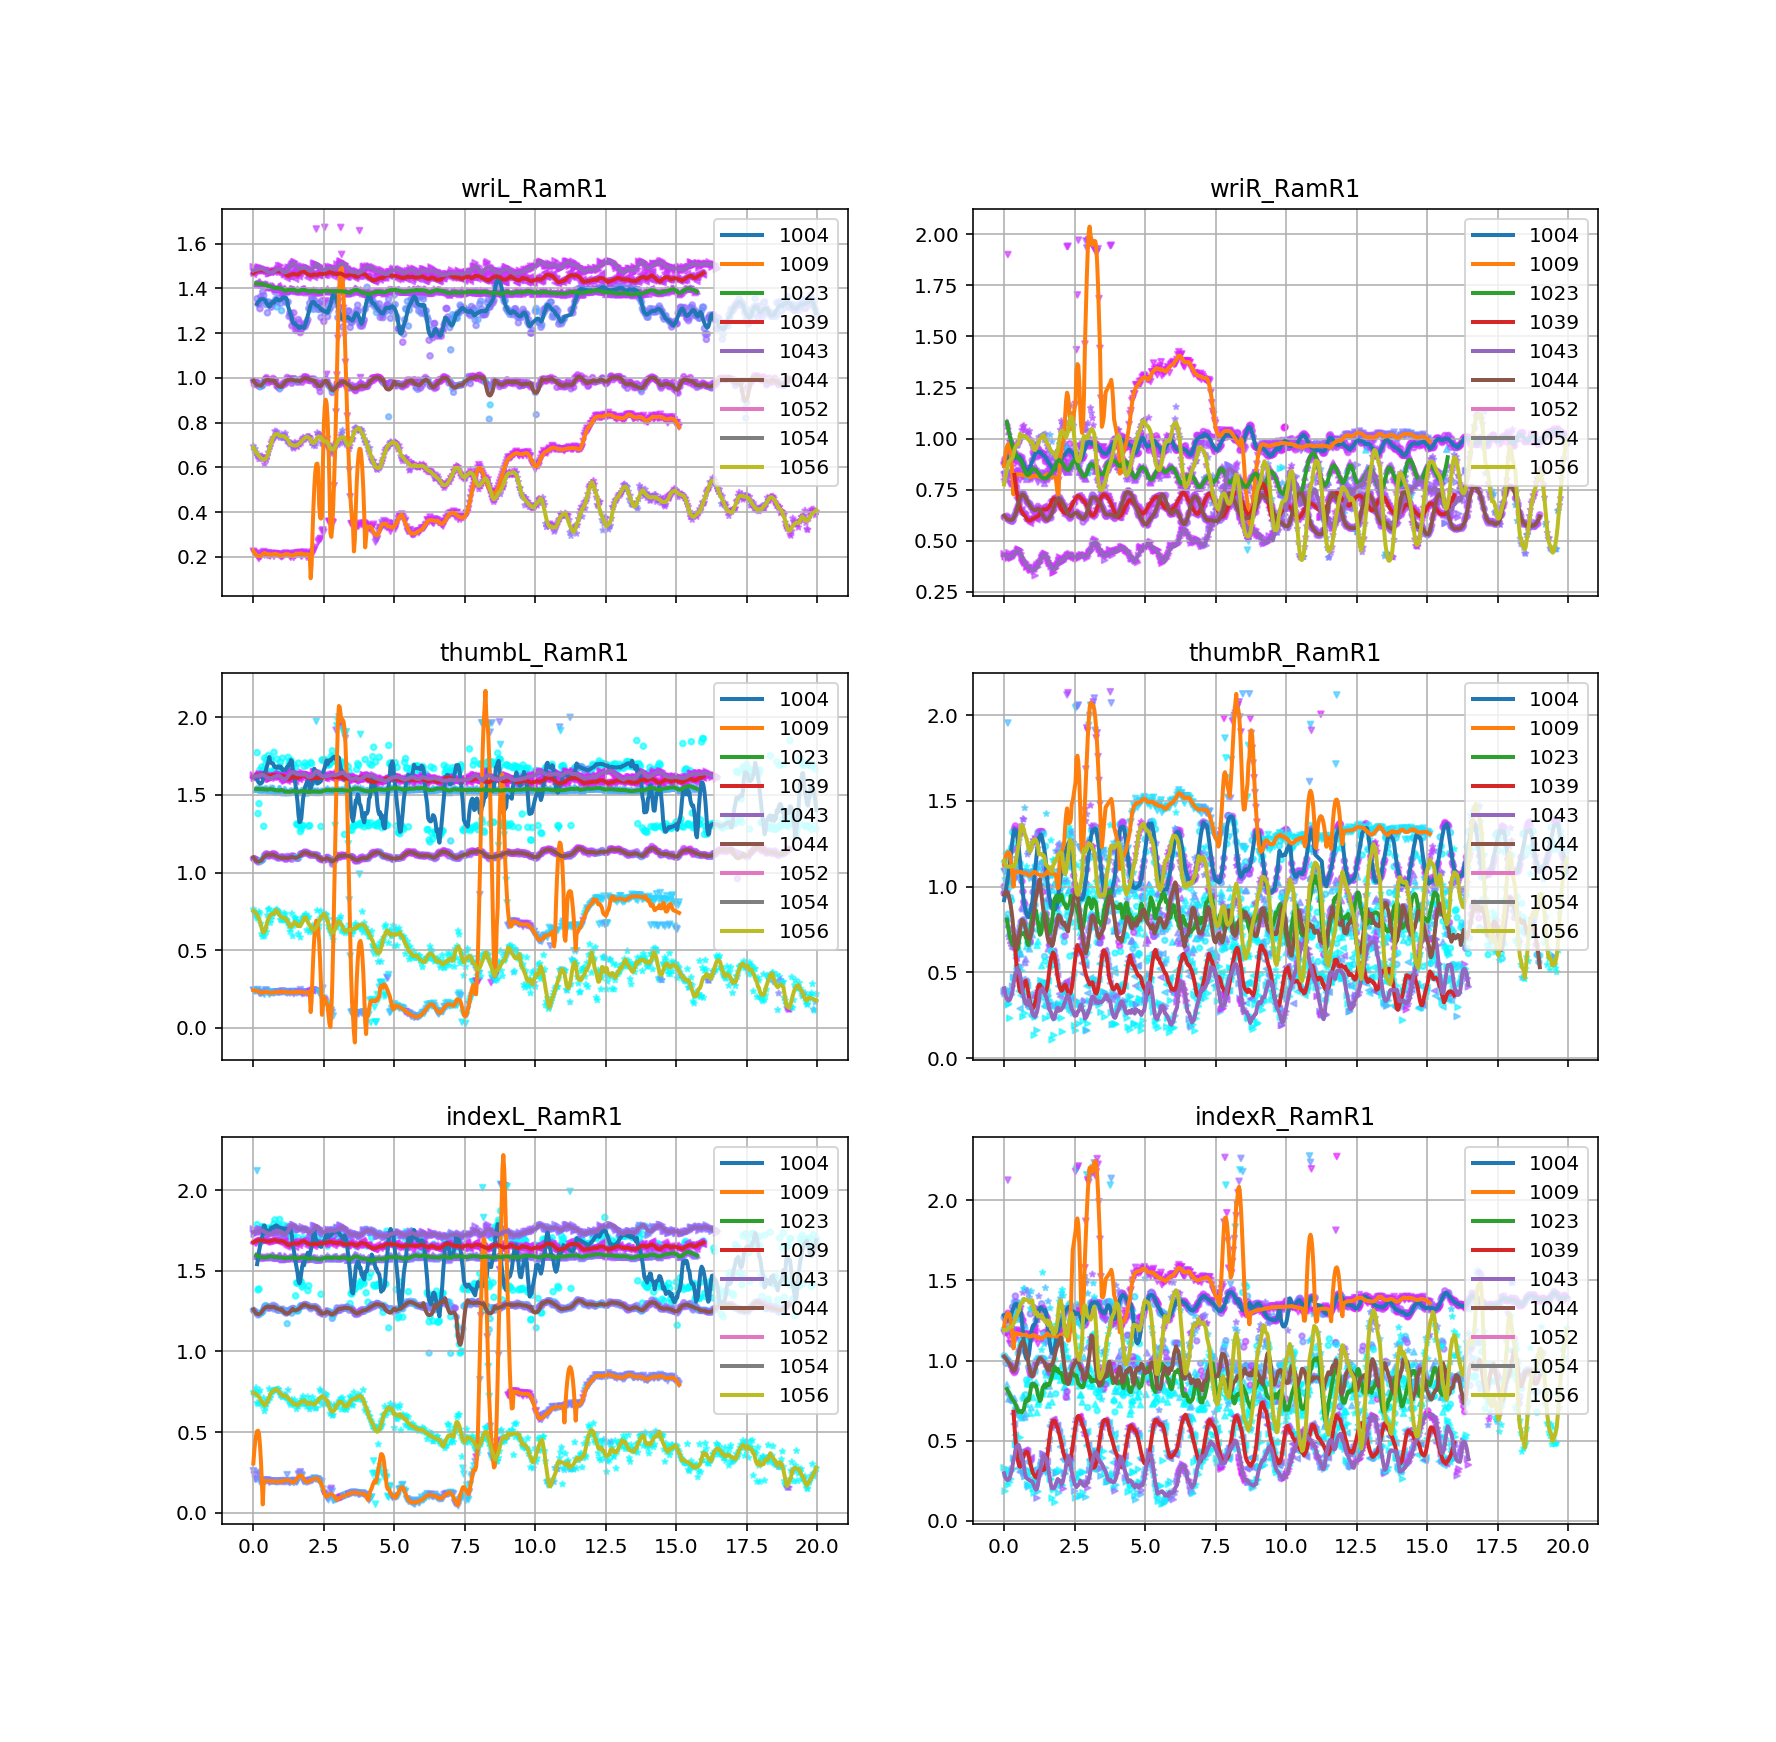

/Users/luca/Projects/RIC/PD_PoseEstimation/Code/HelperFcns.py:13: RuntimeWarning: invalid value encountered in greater
  Snew[np.abs(Sz)>n_std] = np.nan
/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


error fitting filter on  1052 wriL_ 0
error fitting filter on  1052 wriR_ 0
error fitting filter on  1052 thumbL_ 0
error fitting filter on  1052 thumbR_ 0
error fitting filter on  1052 indexL_ 0
error fitting filter on  1052 indexR_ 0
error fitting filter on  1054 wriL_ 0
error fitting filter on  1054 wriR_ 0
error fitting filter on  1054 thumbL_ 0
error fitting filter on  1054 thumbR_ 0
error fitting filter on  1054 indexL_ 0
error fitting filter on  1054 indexR_ 0


In [67]:

plot_joint_trajectory_norm(df, 'RamR', colormap=True)
# plt.savefig('../Figs/FtnR1_All.jpg', dpi=300)

<IPython.core.display.Javascript object>


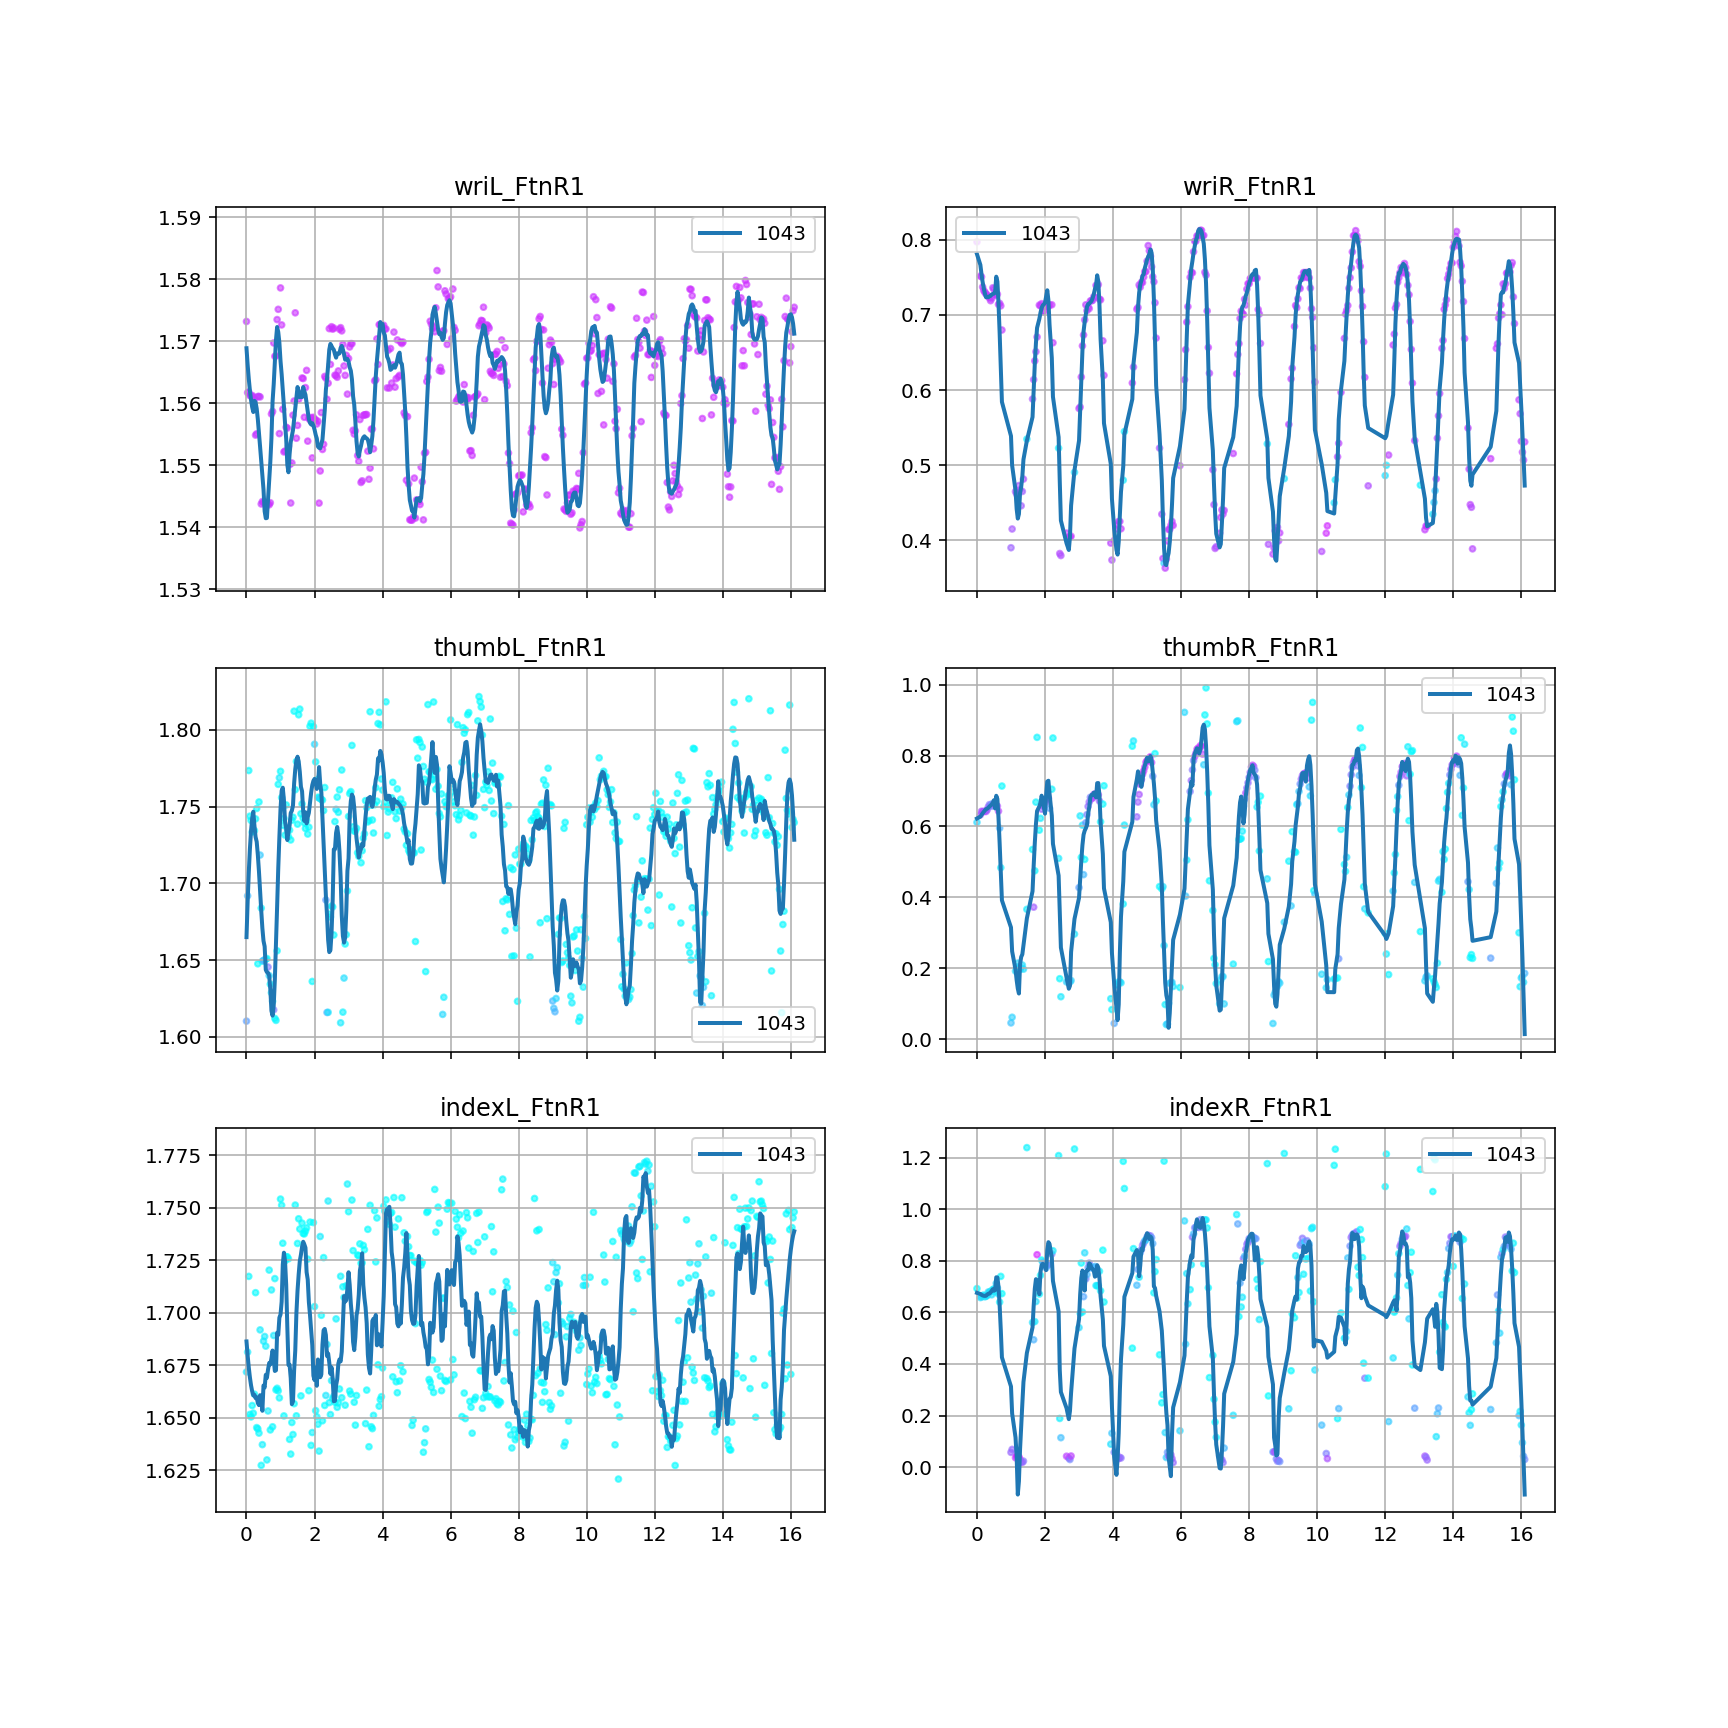

In [45]:
plot_joint_trajectory_norm(df,'FtnR',['1043'],colormap=True)

<IPython.core.display.Javascript object>


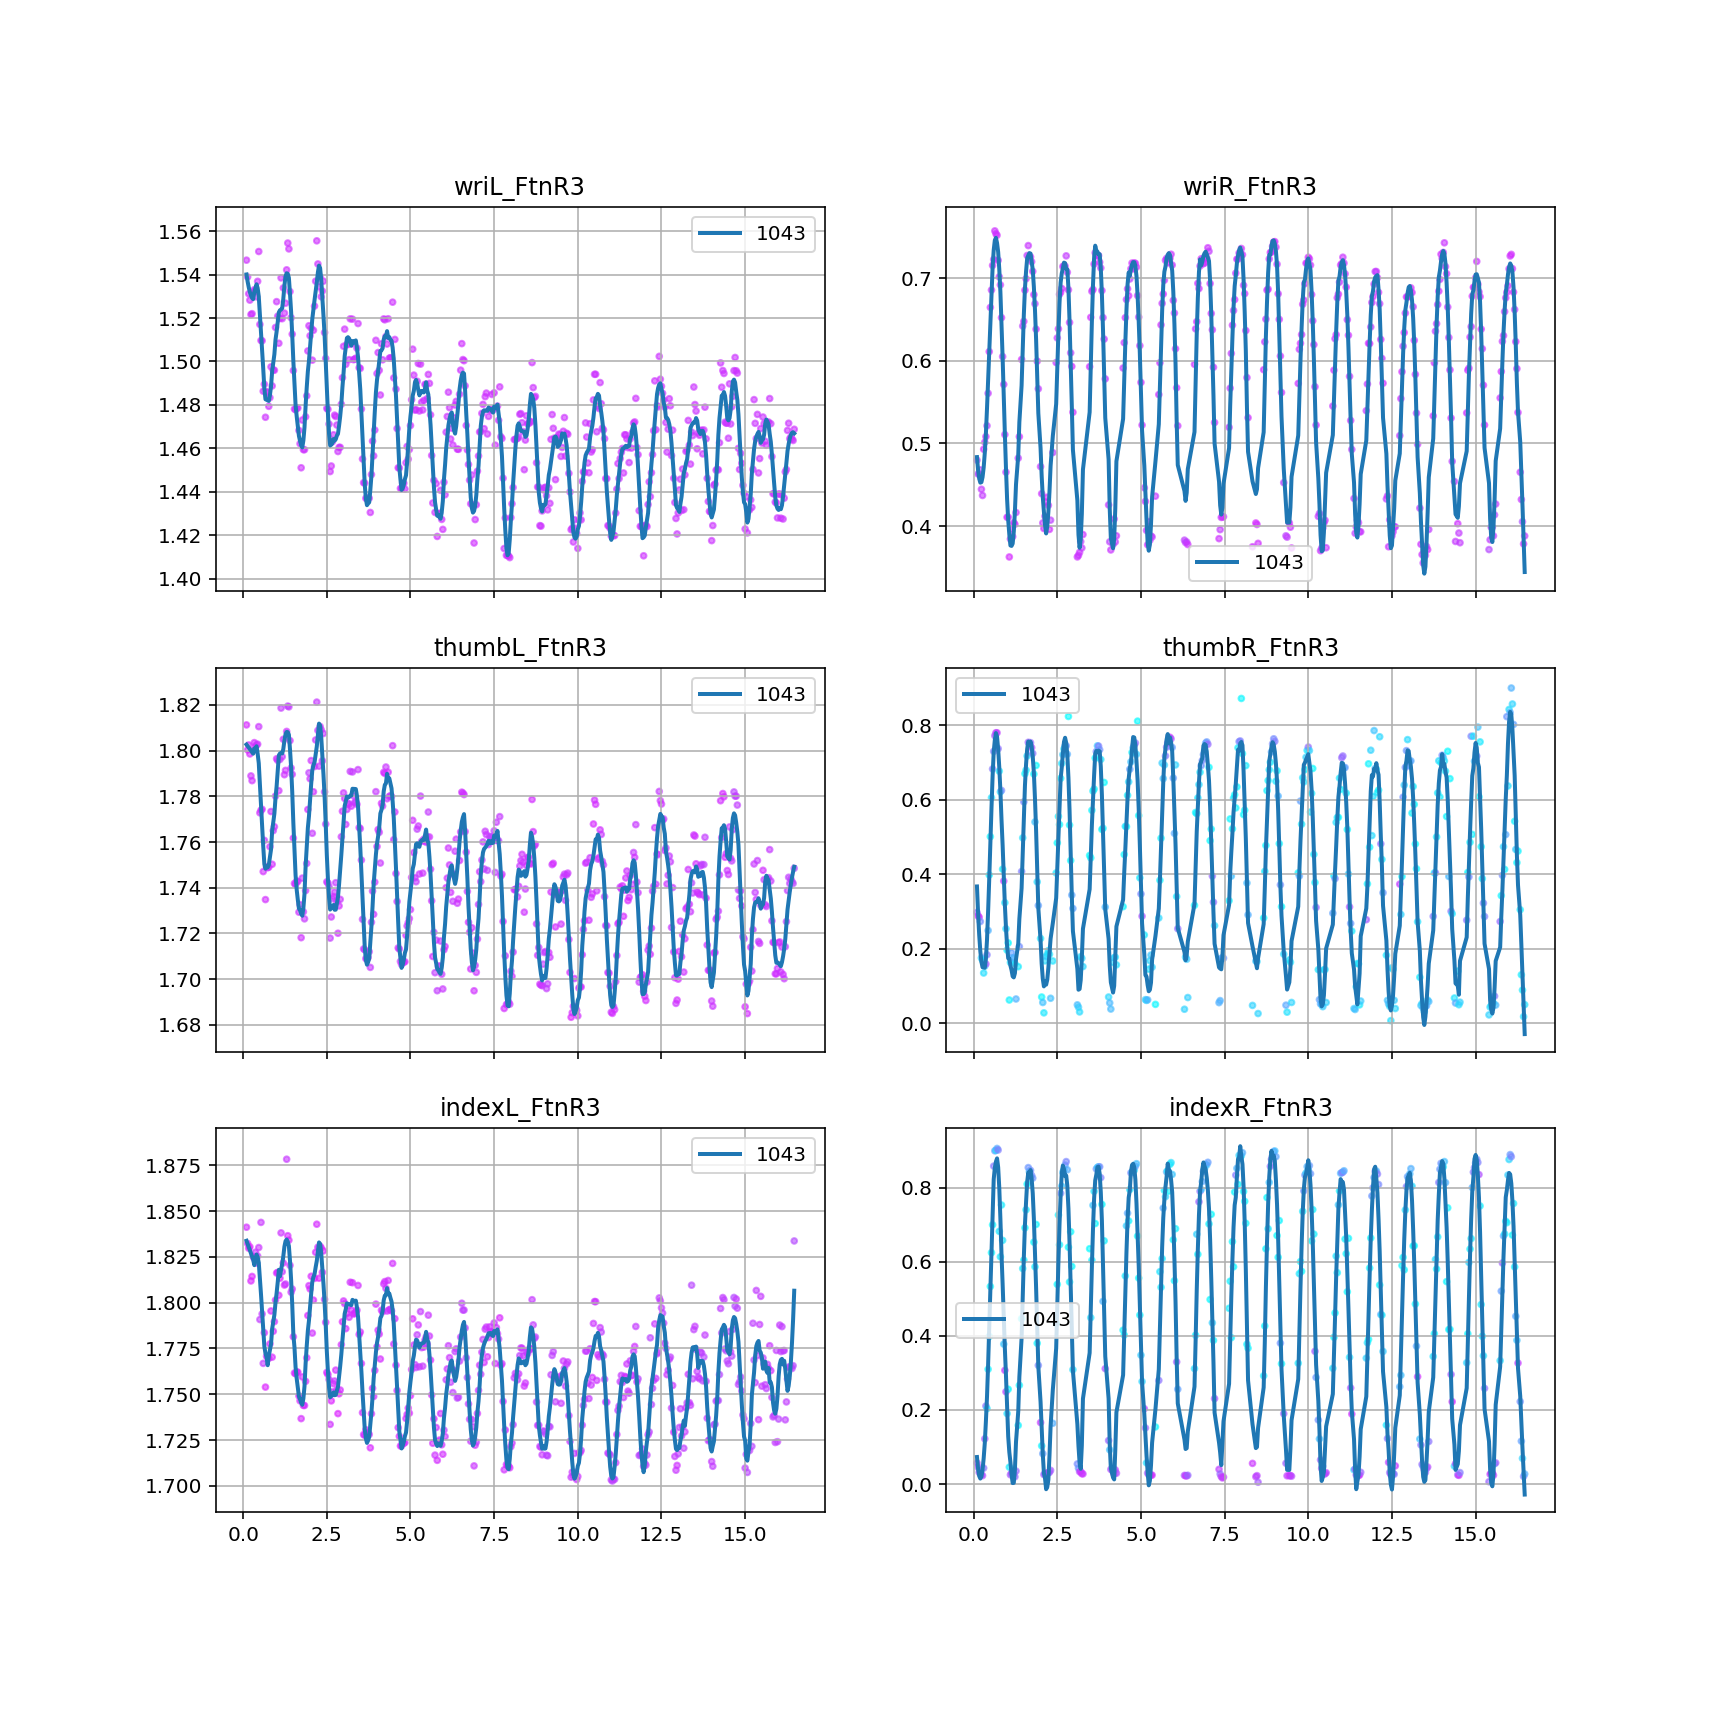

In [46]:
plot_joint_trajectory_norm(df,'FtnR',['1043'],cycle=3,colormap=True)

<IPython.core.display.Javascript object>


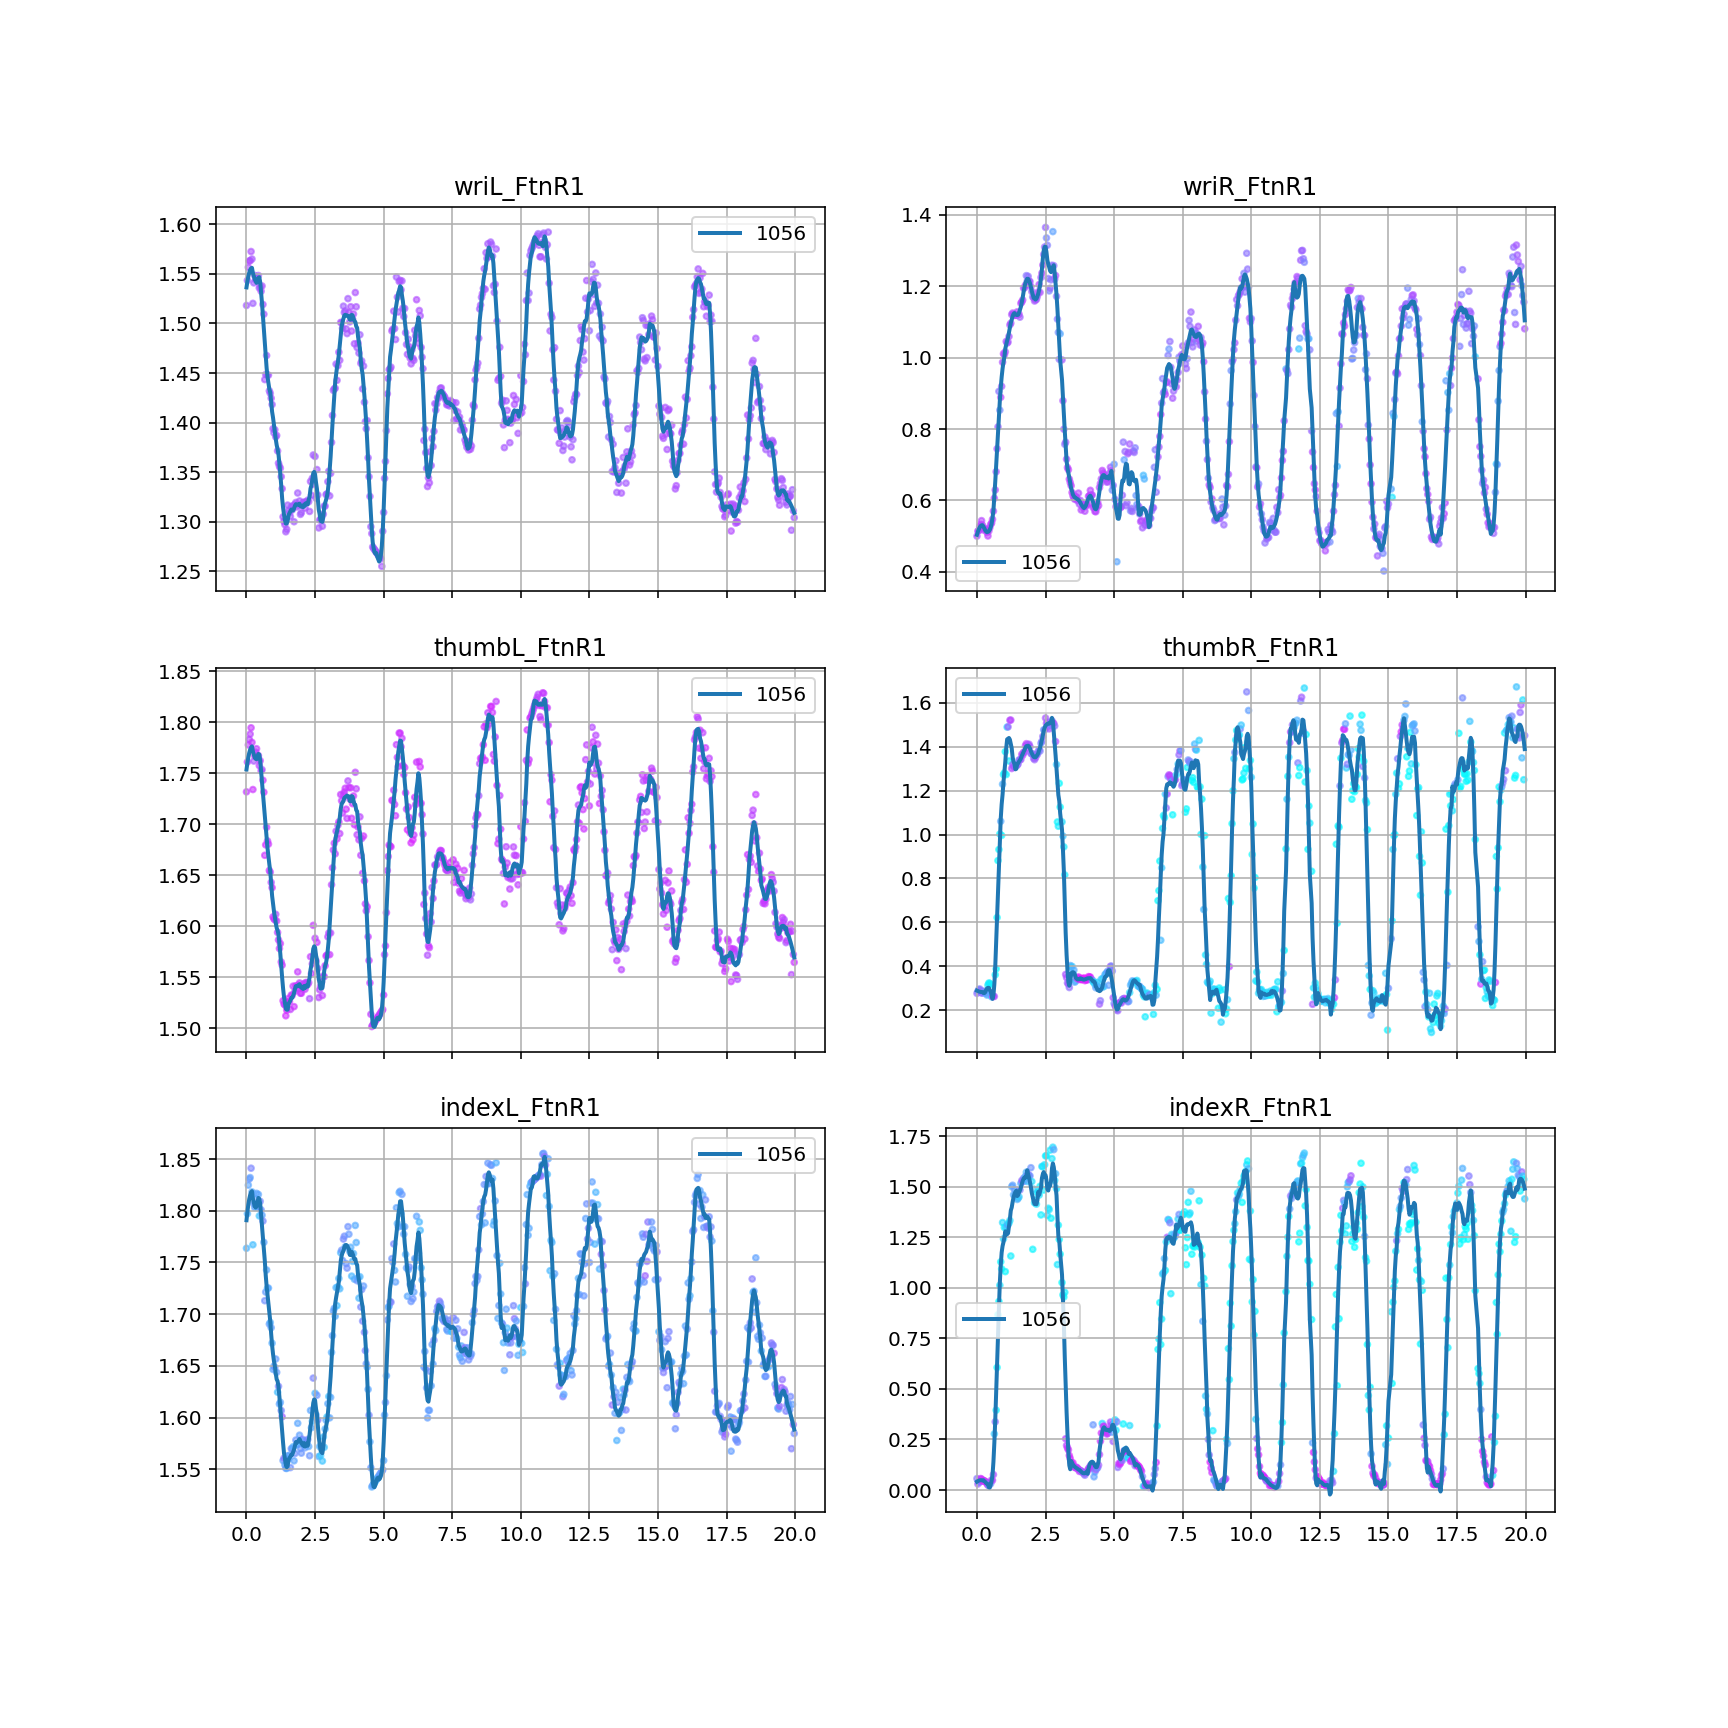

In [50]:
plot_joint_trajectory_norm(df,'FtnR',['1056'],cycle=1,colormap=True)

In [78]:
s = 1043
jj = 'wriR'
task = 'FtnR'
dfs1 = df.query('SubjID == @s & Task==@task & cycle==1').copy()    
dfs3 = df.query('SubjID == @s & Task==@task & cycle==3').copy()    

/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 512 is greater than input length  = 319, using nperseg = 319
  .format(nperseg, input_length))
/Users/luca/Projects/RIC/PD_PoseEstimation/Code/HelperFcns.py:16: RuntimeWarning: invalid value encountered in greater
  Snew[np.abs(Sz)>n_std] = np.nan #need to check Sz and S for nans! (throws # WARNING: )
/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1773: UserWarning: nperseg = 512 is greater than input length  = 397, using nperseg = 397
  .format(nperseg, input_length))


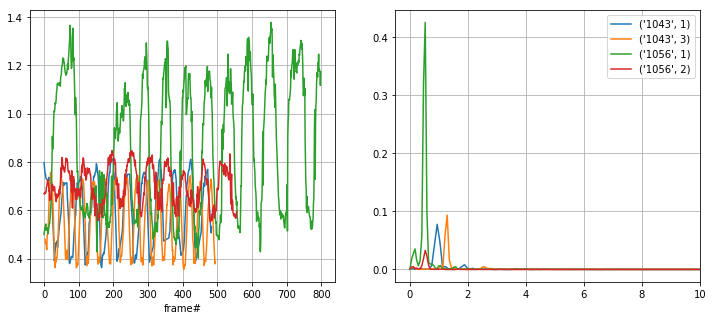

In [128]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_fft(df,['1043','1056'],'wriR_','FtnR',[1,2,3],ax)

In [112]:
dfe = pd.DataFrame()
len(dfe)


0

Plot distance from nose

<IPython.core.display.Javascript object>


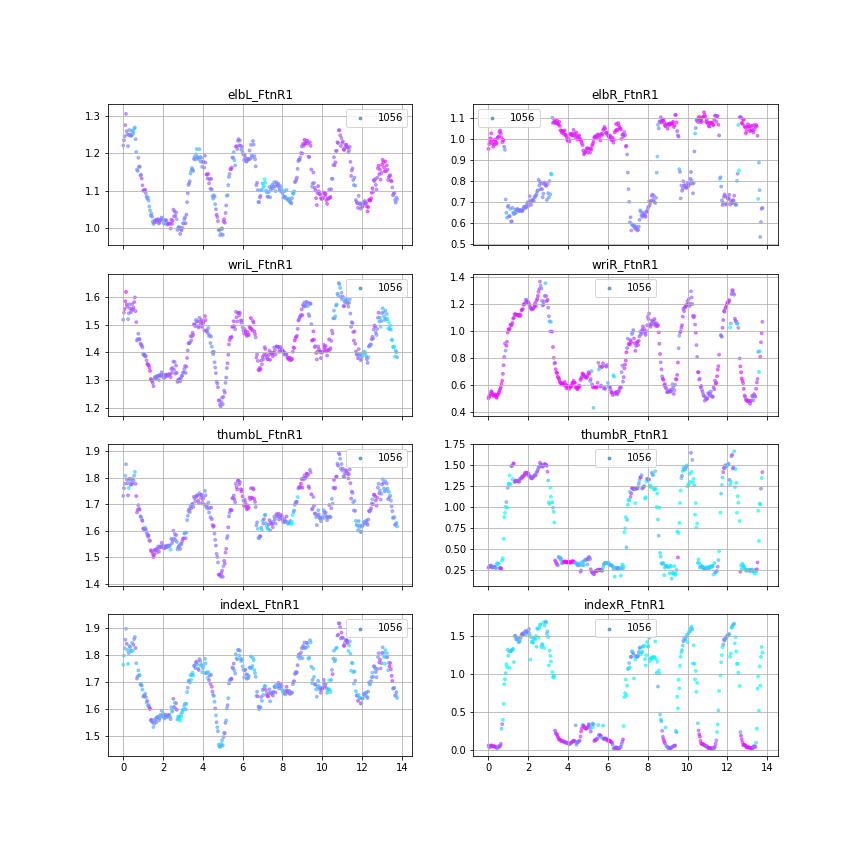

In [29]:
plot_joint_trajectory_norm('FtnR',['1056'], colormap=True)
plt.savefig('../Figs/1056_FtnR1.jpg', dpi=300)

## Ram

<IPython.core.display.Javascript object>


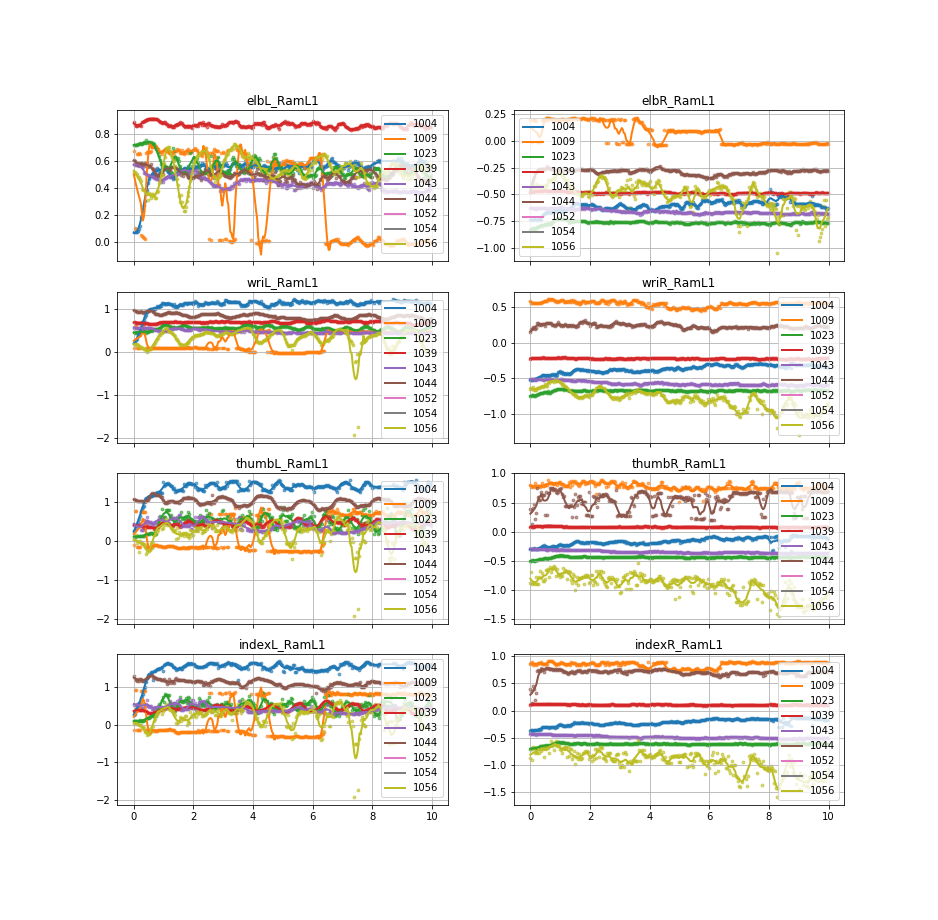

missing  1052 elbL_ 0
missing  1052 elbR_ 0
missing  1052 wriL_ 0
missing  1052 wriR_ 0
missing  1052 thumbL_ 0
missing  1052 thumbR_ 0
missing  1052 indexL_ 0
missing  1052 indexR_ 0
missing  1054 elbL_ 0
missing  1054 elbR_ 0
missing  1054 wriL_ 0
missing  1054 wriR_ 0
missing  1054 thumbL_ 0
missing  1054 thumbR_ 0
missing  1054 indexL_ 0
missing  1054 indexR_ 0


In [31]:
plot_joint_trajectory_norm('RamL')
plt.savefig('../Figs/RamL1_All.jpg', dpi=300)

<IPython.core.display.Javascript object>


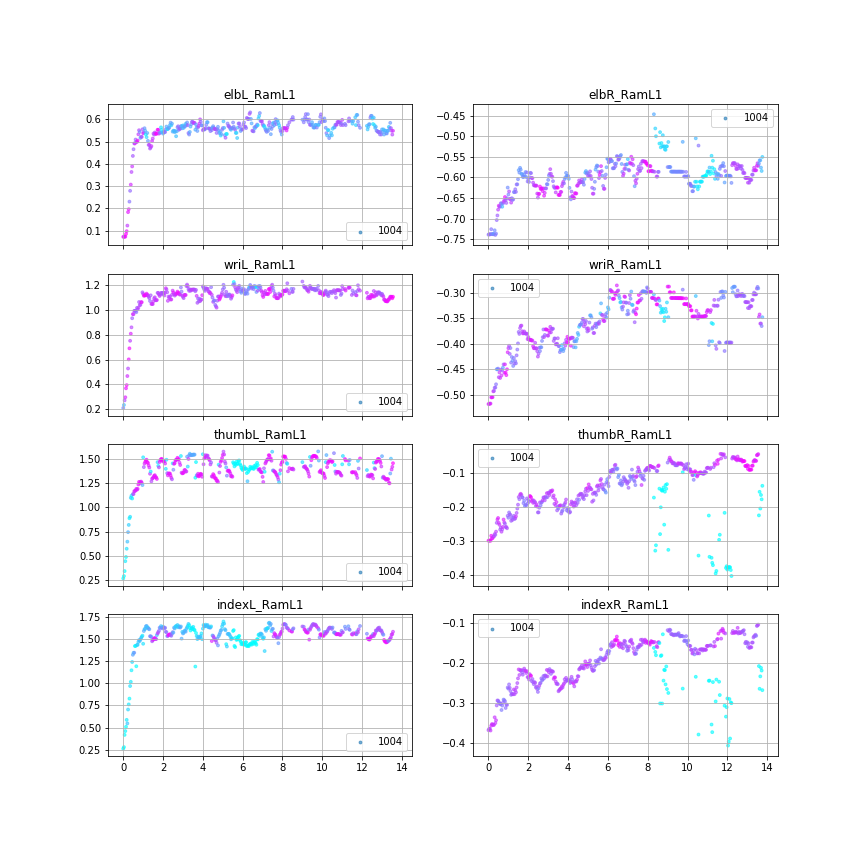

In [31]:
s = '1004'
task = 'RamL'
plot_joint_trajectory_norm(task,[s], colormap=True)
plt.savefig('../Figs/'+s+task+'1.jpg', dpi=300)

In [ ]:
#try different interpolation methods


In [121]:
# dfs = df.query('SubjID==1009 & Task=="FtnR" & cycle==1').copy()
# L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
# p = (dfs.wriR_x - dfs.nose_x)/L
# z = stats.zscore(p)
# sns.distplot(z, bins=40)

Show only x-coordinates from nose

<IPython.core.display.Javascript object>


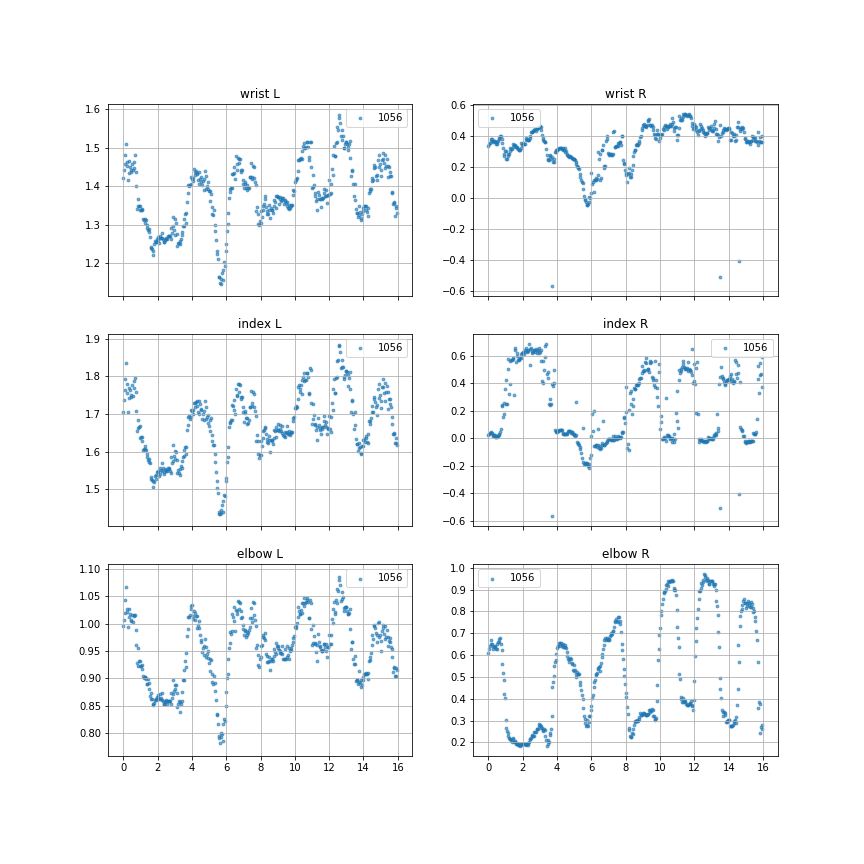

In [126]:
plot_joint_trajectory('FtnR',['1056'])
plt.savefig('../Figs/1056_FtnR1_x.jpg', dpi=300)
# plot_joint_trajectory('FtnR')

This person is moving their head during the task - therefore the left side joints show this change - could be used as a feature to detect motor symptoms?

<IPython.core.display.Javascript object>


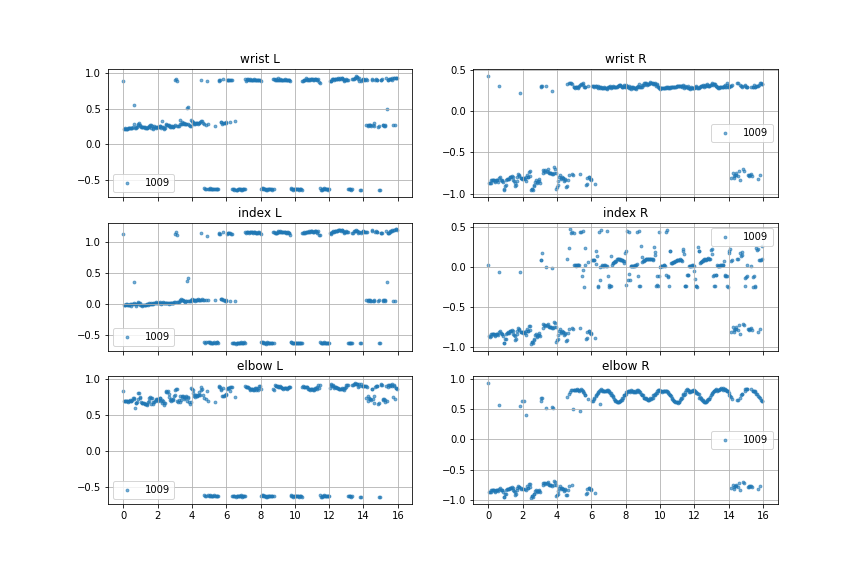

In [95]:
plot_joint_trajectory('FtnR',['1009'])
# plot_joint_trajectory('FtnR')

<IPython.core.display.Javascript object>


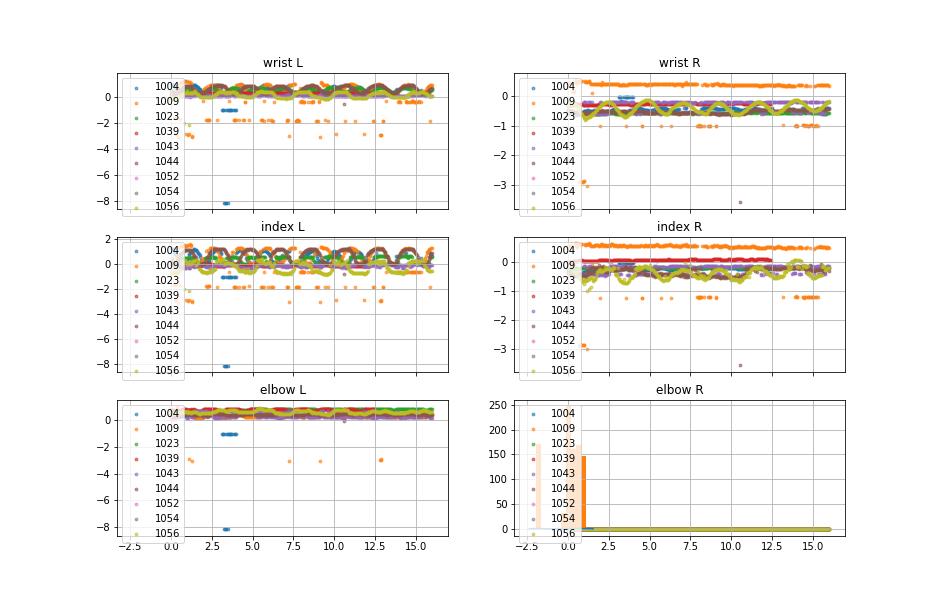

In [39]:
plot_joint_trajectory('FtnL')

## TO DO

### Missed detection problem
* Remove outliers: distribution of deltas (speeds)
* or remove detection with low confidence


<IPython.core.display.Javascript object>


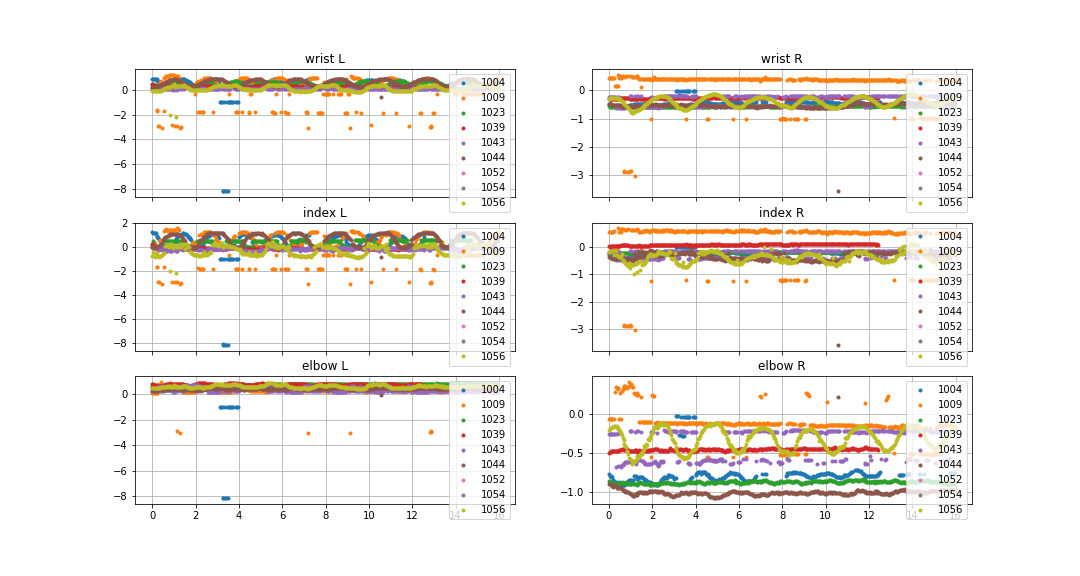

In [135]:
plot_joint_trajectory('FtnL')

<IPython.core.display.Javascript object>


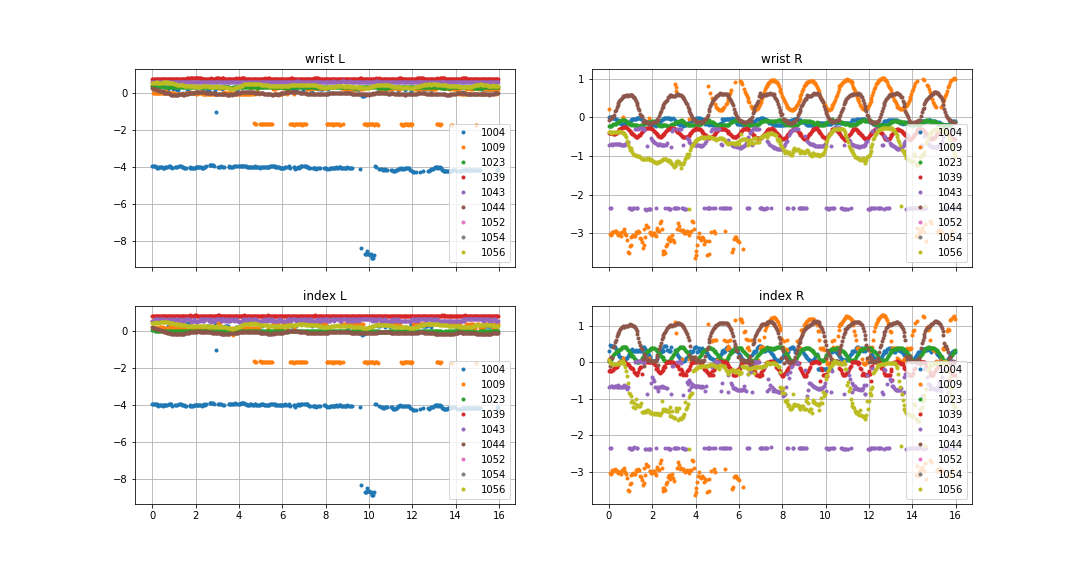

In [97]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
T = 400

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15,8))
for s in df.SubjID.unique():
    
    dfs = df.query('SubjID == @s & Task=="FtnR" & cycle==1').copy()    
    dfs = dfs[:T]

    #normalization factor (hip length)    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
        
    ax[0,0].plot(t[:T], (dfs.wriL_x - dfs.nose_x)/L ,'o', MarkerSize=3); ax[0,0].set_title('wrist L')
    ax[0,1].plot(t[:T], (dfs.wriR_x - dfs.nose_x)/L,'o', MarkerSize=3); ax[0,1].set_title('wrist R')
    ax[1,0].plot(t[:T], (dfs.indexL_x - dfs.nose_x)/L, 'o', MarkerSize=3 ); ax[1,0].set_title('index L')
    ax[1,1].plot(t[:T], (dfs.indexR_x - dfs.nose_x)/L,'o', MarkerSize=3 ); ax[1,1].set_title('index R')
    
ax = ax.ravel()
for i in range(4):
    ax[i].grid()
    ax[i].legend(df.SubjID.unique())

<IPython.core.display.Javascript object>


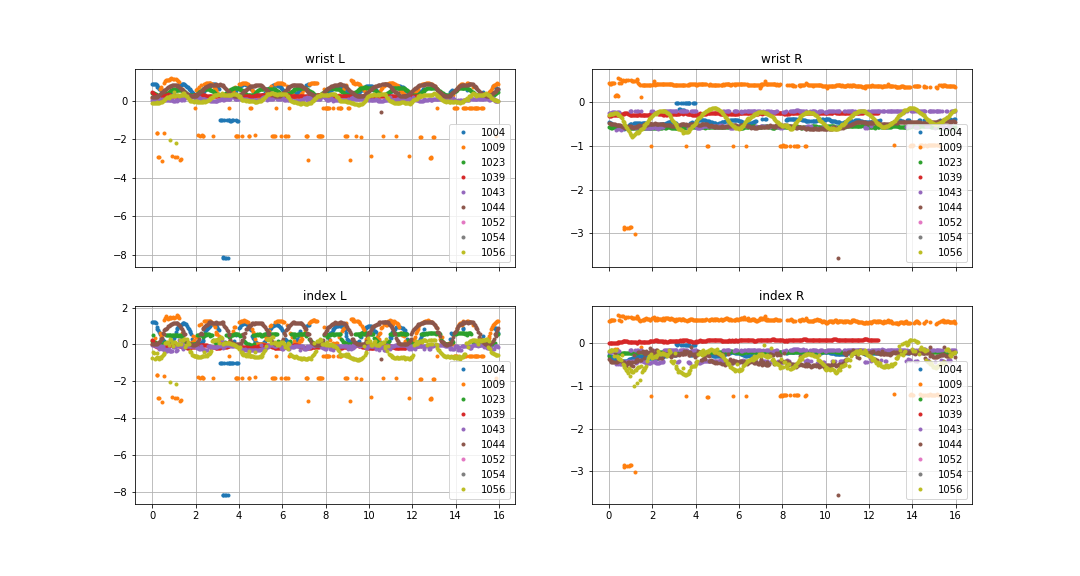

In [99]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]
T = 400

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15,8))
for s in df.SubjID.unique():
    
    dfs = df.query('SubjID == @s & Task=="FtnL" & cycle==1').copy()    
    dfs = dfs[:T]

    #normalization factor (hip length)    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
        
    ax[0,0].plot(t[:T], (dfs.wriL_x - dfs.nose_x)/L ,'o', MarkerSize=3); ax[0,0].set_title('wrist L')
    ax[0,1].plot(t[:T], (dfs.wriR_x - dfs.nose_x)/L,'o', MarkerSize=3); ax[0,1].set_title('wrist R')
    ax[1,0].plot(t[:T], (dfs.indexL_x - dfs.nose_x)/L, 'o', MarkerSize=3 ); ax[1,0].set_title('index L')
    ax[1,1].plot(t[:T], (dfs.indexR_x - dfs.nose_x)/L,'o', MarkerSize=3 ); ax[1,1].set_title('index R')
    
ax = ax.ravel()
for i in range(4):
    ax[i].grid()
    ax[i].legend(df.SubjID.unique())

<IPython.core.display.Javascript object>


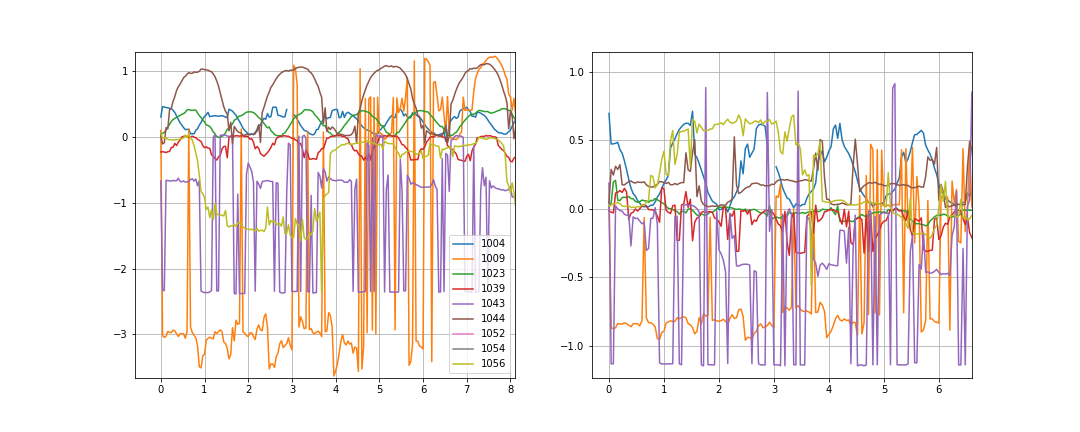

In [53]:
#list of bodyparts to normalize (for later)
bodyparts = list(df.columns)
bodyparts = [b for b in bodyparts if ('R' in b or 'L' in b) and ('_c' not in b)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,6))
for s in df.SubjID.unique():
    s = str(s)
    dfs = df.query('SubjID == @s & Task=="FtnR" & cycle==1').copy()    
    L = (np.sqrt( (dfs.midHip_x -dfs.neck_x)**2 + (dfs.midHip_y-dfs.neck_y)**2) ) #trunk length (ref length)
    t = dfs.index/25
    ax1.plot(t, (dfs.indexR_x - dfs.nose_x)/L)
    ax2.plot(t, (dfs.indexR_y - dfs.nose_y)/L)
ax1.grid(); ax2.grid()
ax1.legend(df.SubjID.unique())

## Process single user / task

In [4]:
subj = '1004'
task = 'RamL'
cycle = 1
task = task+'_'+str(cycle)
filepath = datapath / subj
print(filepath)

C:\openpose\output\1004


In [128]:
data_files = os.listdir(filepath)
data_files[:5]

['FtnL_1_000000000000_keypoints.json',
 'FtnL_1_000000000001_keypoints.json',
 'FtnL_1_000000000002_keypoints.json',
 'FtnL_1_000000000003_keypoints.json',
 'FtnL_1_000000000004_keypoints.json']

In [131]:
posefiles = glob.glob((filepath / task).as_posix()+'*')
posefiles = [Path(p) for p in posefiles] 
print(posefiles[0])

C:\openpose\output\1004\RamL_1_000000000000_keypoints.json


In [132]:
with open(posefiles[0]) as f:
    data= json.load(f)

In [133]:
len((data['people'])) # 3 people identified in video frame

2

In [134]:
df = pd.DataFrame()
Npeople = []
for file in posefiles:
    with open(file) as f:
        try:
            data = json.load(f)
        except(UnicodeDecodeError):
            print('cannot parse ',str(file))
            
    Npeople.append(len(data['people']))
    person = 0
    pose = data['people'][person]['pose_keypoints_2d']
    pose_hand_L = data['people'][person]['hand_left_keypoints_2d']
    pose_hand_R = data['people'][person]['hand_right_keypoints_2d']
    d = {'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23],
         'nose_x':pose[0], 'nose_y':pose[1], 'nose_c':pose[2], 
         'thumbR_x':pose_hand_R[12], 'thumbR_y':pose_hand_R[13], 'thumbR_c':pose_hand_R[14],
         'indexR_x':pose_hand_R[24], 'indexR_y':pose_hand_R[25], 'indexR_c':pose_hand_R[26],
         'thumbL_x':pose_hand_L[12], 'thumbL_y':pose_hand_L[13], 'thumbL_C':pose_hand_L[14],
         'indexL_x':pose_hand_L[24], 'indexL_y':pose_hand_L[25], 'indexL_c':pose_hand_L[26],
}
    df = pd.concat((df,pd.DataFrame(d, index=[0])))
    
df.reset_index(drop=True, inplace=True)
t = df.index/25
df.set_index(t, inplace=True)

In [135]:
data['people'][0].keys()

dict_keys(['person_id', 'pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [136]:
df.head()

elbR_x   elbR_y    elbR_c   wriR_x   wriR_y    wriR_c   elbL_x  \
0.00  346.376  214.561  0.855726  369.869  275.858  0.867179  432.471   
0.04  346.378  214.558  0.857908  369.858  275.828  0.866287  432.472   
0.08  346.374  214.556  0.858197  369.877  275.844  0.867750  432.500   
0.12  346.367  214.497  0.859585  369.865  275.831  0.865118  432.488   
0.16  346.352  213.280  0.852371  369.866  275.832  0.864910  432.558   

       elbL_y    elbL_c   wriL_x  ...  thumbR_c  indexR_x  indexR_y  indexR_c  \
0.00  181.946  0.858018  446.871  ...  0.727908   385.696   312.234  0.333271   
0.04  181.947  0.858410  449.478  ...  0.730573   385.969   312.198  0.322596   
0.08  181.943  0.860964  453.384  ...  0.695404   385.996   311.354  0.333940   
0.12  181.972  0.868896  456.025  ...  0.711232   385.500   311.543  0.360925   
0.16  183.182  0.878340  462.544  ...  0.704232   385.516   311.963  0.384546   

      thumbL_x  thumbL_y  thumbL_C  indexL_x  indexL_y  indexL_c  
0.00   453.429   239.308  0.010885   452.526   240.888  0.006771  
0.04   456.005   240.078  0.010123   454.403   241.451  0.007988  
0.08   461.397   246.937  0.017116   469.021   250.524  0.008181  
0.12   472.192   250.438  0.072813   473.592   254.871  0.035328  
0.16   475.572   248.310  0.017975   477.500   248.310  0.010525  

[5 rows x 27 columns]

Text(0.5, 1.0, 'wrist y')

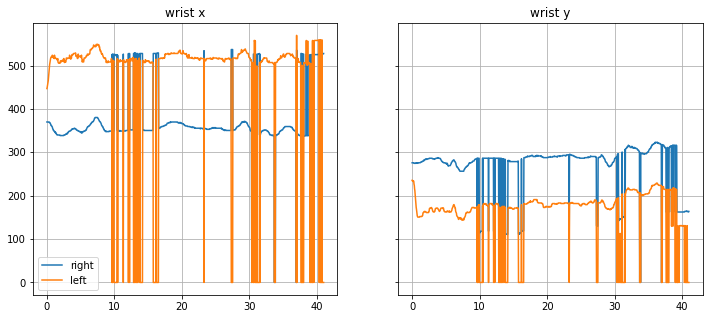

In [141]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.wriR_x)
ax1.plot(df.wriL_x)
ax1.grid(); ax1.set_title('wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y)
ax2.plot(df.wriL_y)
ax2.grid(); ax2.set_title('wrist y')

In [151]:
dfcopy = df.copy()
df = df.iloc[:125,:]

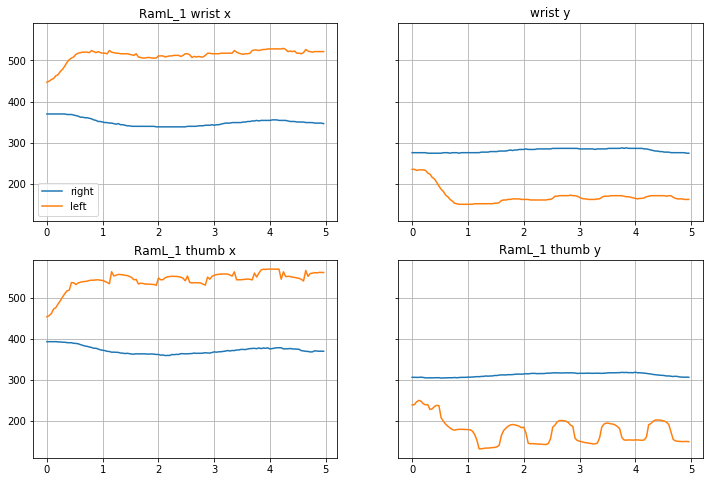

In [152]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(12,8))
ax1 = ax[0,0]; ax2 = ax[0,1]; ax3=ax[1,0]; ax4 = ax[1,1]
ax1.plot(df.wriR_x)
ax1.plot(df.wriL_x)
ax1.grid(); ax1.set_title(task + ' wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y)
ax2.plot(df.wriL_y)
ax2.grid(); ax2.set_title('wrist y')
ax3.plot(df.thumbR_x)
ax3.plot(df.thumbL_x)
ax3.grid(); ax3.set_title(task + ' thumb x');
ax4.plot(df.thumbR_y)
ax4.plot(df.thumbL_y)
ax4.grid(); ax4.set_title(task + ' thumb y'); 


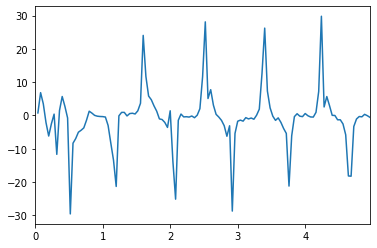

In [162]:
df.thumbL_y.diff().plot()

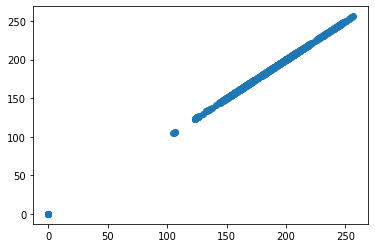

In [150]:
plt.scatter(df.thumbL_y, df.thumbL_y)

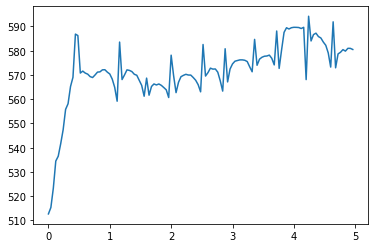

In [160]:
plt.plot(np.sqrt(df.thumbL_x**2 + df.thumbL_y**2))

Text(0.5, 1.0, 'index finger y')

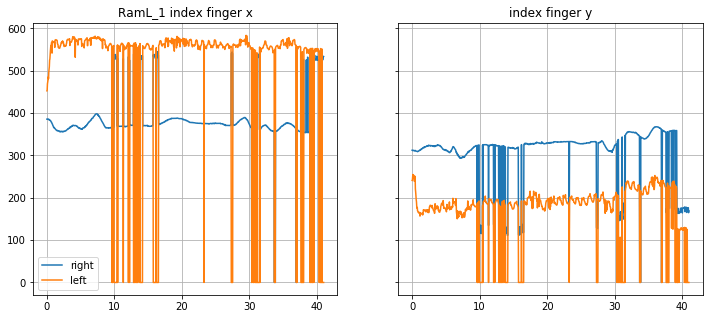

In [138]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.thumbR_x)
ax1.plot(df.thumbL_x)
ax1.grid(); ax1.set_title(task + ' thumb x'); ax1.legend(['right','left'])
ax2.plot(df.indexR_y)
ax2.plot(df.indexL_y)
ax2.grid(); ax2.set_title('index finger y')

Text(0.5, 1.0, 'relative wrist y')

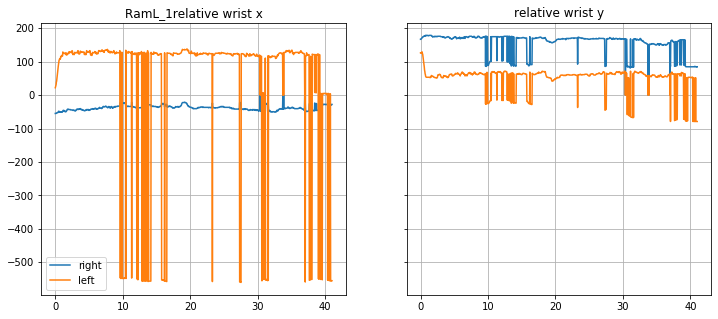

In [139]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))
ax1.plot(df.wriR_x-df.nose_x)
ax1.plot(df.wriL_x-df.nose_x)
ax1.grid(); ax1.set_title(task + 'relative wrist x'); ax1.legend(['right','left'])
ax2.plot(df.wriR_y-df.nose_y)
ax2.plot(df.wriL_y-df.nose_y)
ax2.grid(); ax2.set_title('relative wrist y')

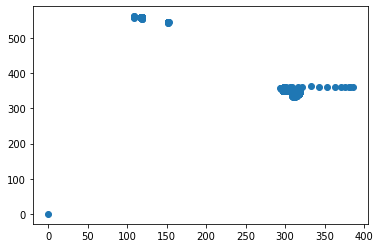

In [123]:
plt.scatter(df.wriR_y, df.wriR_x) #can remove outliers

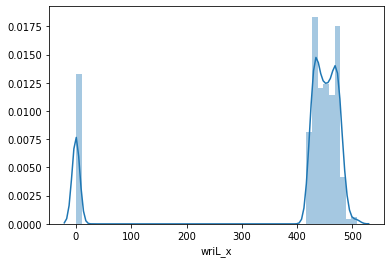

In [126]:
sns.distplot(df.wriL_x)

### Preliminary test

In [222]:
data_files[:4]

['Cycle2_edited_000000000000_keypoints.json',
 'Cycle2_edited_000000000001_keypoints.json',
 'Cycle2_edited_000000000002_keypoints.json',
 'Cycle2_edited_000000000003_keypoints.json']

In [196]:
with open(data_folder / data_files[6]) as f:
    data= json.load(f)

In [197]:
data.keys()

dict_keys(['version', 'people'])

In [198]:
len((data['people'])) # 3 people identified in video frame?

2

In [199]:
data['people'][0].keys()

dict_keys(['person_id', 'pose_keypoints_2d', 'face_keypoints_2d', 'hand_left_keypoints_2d', 'hand_right_keypoints_2d', 'pose_keypoints_3d', 'face_keypoints_3d', 'hand_left_keypoints_3d', 'hand_right_keypoints_3d'])

In [200]:
for i in range(len(data['people'])):
    print(data['people'][i]['person_id'])

[-1]
[-1]


In [213]:
person = 0
pose = data['people'][person]['pose_keypoints_2d']
pose[:10]

[962.991,
 456.662,
 0.858281,
 1007.1,
 539.114,
 0.76923,
 883.451,
 509.65,
 0.747284,
 733.394]

In [214]:
#joint 3 and 4 are right elbow and wrist
joint = 3 #
elb_R_x = pose[3*joint]
elb_R_y = pose[3*joint+1]
joint = 4
wri_R_x = pose[3*joint]
wri_R_y = pose[3*joint+1]
joint = 6
elb_L_x = pose[3*joint]
elb_L_y = pose[3*joint+1]
joint = 7
wri_L_x = pose[3*joint]
wri_L_y = pose[3*joint+1]

(0, 800)

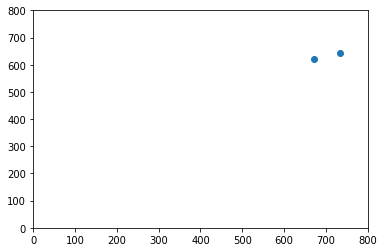

In [215]:
plt.scatter([elb_R_x,wri_R_x],[elb_R_y,wri_R_y])
plt.scatter([elb_L_x,wri_L_x],[elb_L_y,wri_L_y])
plt.xlim([0,800]); plt.ylim([0, 800])

## Process all frames

In [229]:
data_folder / file

WindowsPath('OpenPoseOutput/result.avi')

In [256]:
df = pd.DataFrame()
for file in data_files:
    with open(data_folder / file) as f:
        try:
            data = json.load(f)
        except(UnicodeDecodeError):
            print('cannot parse ',str(file))
    person = 0
    pose = data['people'][person]['pose_keypoints_2d']
    d = {'elbR_x':pose[9], 'elbR_y':pose[10], 'elbR_c':pose[11], 'wriR_x':pose[12], 'wriR_y':pose[13], 'wriR_c':pose[14], 
         'elbL_x':pose[18], 'elbL_y':pose[19], 'elbL_c':pose[20], 'wriL_x':pose[21], 'wriL_y':pose[22], 'wriL_c':pose[23]}
    df = pd.concat((df,pd.DataFrame(d, index=[0])))

cannot parse  result.avi


In [257]:
df.reset_index(drop=True, inplace=True)

In [258]:
t = df.index/25
df.set_index(t, inplace=True)

In [259]:
df.head()

elbR_x   elbR_y    elbR_c   wriR_x   wriR_y    wriR_c   elbL_x  \
0.00  700.987  695.037  0.757156  715.604  624.580  0.816592  1195.43   
0.04  698.030  689.221  0.746408  700.963  630.423  0.776109  1189.72   
0.08  703.963  680.389  0.602480  692.267  633.310  0.768762  1189.64   
0.12  721.656  659.765  0.600823  689.162  627.479  0.769042  1189.55   
0.16  739.206  645.046  0.703967  683.332  627.446  0.748440  1189.52   

       elbL_y    elbL_c   wriL_x   wriL_y    wriL_c  
0.00  812.790  0.825597  1018.89  895.232  0.692139  
0.04  810.002  0.837186  1012.99  895.231  0.693593  
0.08  809.911  0.845339  1021.69  889.341  0.708843  
0.12  809.961  0.852632  1007.11  898.137  0.695125  
0.16  809.820  0.851107  1015.92  886.518  0.700045

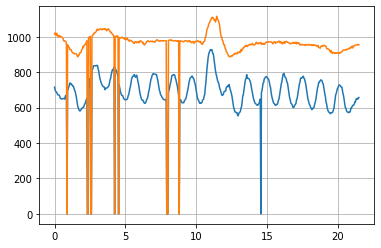

In [268]:
plt.plot(df.wriR_x)
plt.plot(df.wriL_x)
plt.grid()

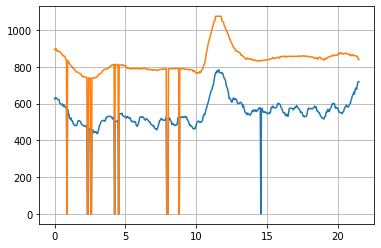

In [273]:
plt.plot(df.wriR_y)
plt.plot(df.wriL_y)
plt.grid()

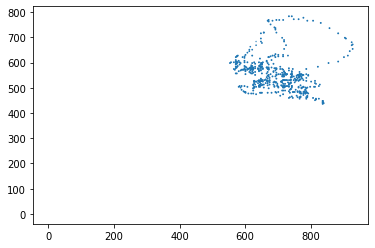

In [265]:
plt.scatter(df.wriR_x, df.wriR_y, df.wriR_c)
# plt.scatter(df.elbR_x, df.elbR_y, df.elbR_c)

(0, 800)

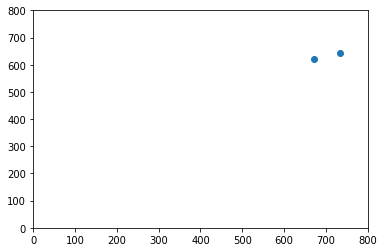

In [203]:
plt.scatter([elb_x,wri_x],[elb_y,wri_y])
plt.xlim([0,800]); plt.ylim([0, 800])

In [163]:
person = 0
hand_r = data['people'][person]['hand_right_keypoints_2d']
hand_l = data['people'][person]['hand_left_keypoints_2d']

In [164]:
print(len(hand_r), len(hand_l))

63 63


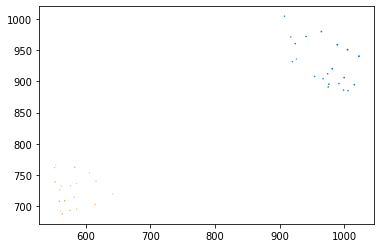

In [166]:
plt.scatter(hand_l[1::3], hand_l[0::3], hand_l[2::3])
plt.scatter(hand_r[1::3], hand_r[0::3], hand_r[2::3])

In [167]:
person = 0
pose = data['people'][person]['pose_keypoints_2d']

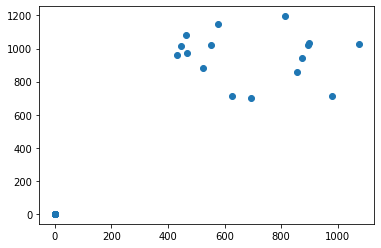

In [169]:
plt.plot(pose[1::3], pose[0::3],'o')


In [41]:
data['people'][1]

{'person_id': [-1],
 'pose_keypoints_2d': [341.974,
  586.155,
  0.85139,
  0,
  0,
  0,
  121.172,
  868.745,
  0.169763,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  356.621,
  521.438,
  0.756104,
  0,
  0,
  0,
  268.268,
  462.658,
  0.816105,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'face_keypoints_2d': [],
 'hand_left_keypoints_2d': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'hand_right_keypoints_2d': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

## Misc

In [94]:
#renaming files 
import shutil

task = 'RamR'
path = 'c:/openpose/output/1054/'
files = glob.glob(path+'Cycle3_'+task+'*')
files = [Path(f) for f in files]
for f in files:
    dest_ = f.as_posix().split('_')[1:]
    dest_.insert(1,'_2_')
    dest_ = ''.join(dest_)
    destination = Path('c:/openpose/output/1054/new/' / Path(dest_))
    dst = shutil.copyfile(f, destination)



In [218]:
path = 'c:/openpose/output/1054/'
files = os.listdir(path)
for f in files:
    ind = f.find('keypoints')
    newfile = f[:ind]+'_'+f[ind:]
    destination = Path('c:/openpose/output/1054_new/'+newfile)
    dst = shutil.copyfile(Path(path+f), destination)
    print(Path(path+f), destination)


c:\openpose\output\1054\RamL_2_000000000000keypoints.json c:\openpose\output\1054_new\RamL_2_000000000000_keypoints.json
c:\openpose\output\1054\RamL_2_000000000001keypoints.json c:\openpose\output\1054_new\RamL_2_000000000001_keypoints.json
c:\openpose\output\1054\RamL_2_000000000002keypoints.json c:\openpose\output\1054_new\RamL_2_000000000002_keypoints.json
c:\openpose\output\1054\RamL_2_000000000003keypoints.json c:\openpose\output\1054_new\RamL_2_000000000003_keypoints.json
c:\openpose\output\1054\RamL_2_000000000004keypoints.json c:\openpose\output\1054_new\RamL_2_000000000004_keypoints.json
c:\openpose\output\1054\RamL_2_000000000005keypoints.json c:\openpose\output\1054_new\RamL_2_000000000005_keypoints.json
c:\openpose\output\1054\RamL_2_000000000006keypoints.json c:\openpose\output\1054_new\RamL_2_000000000006_keypoints.json
c:\openpose\output\1054\RamL_2_000000000007keypoints.json c:\openpose\output\1054_new\RamL_2_000000000007_keypoints.json
c:\openpose\output\1054\RamL_2_0

In [215]:
files[1]

'RamL_2_000000000000keypoints.json'

In [182]:
str2 = files[0]
str2[str2.find('keypoints')]

'k'

In [187]:
str2[:19]+'_'+str2[19:]

'FtnL_2_000000000000_keypoints.json'

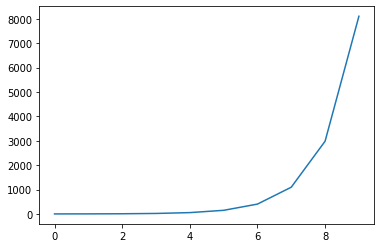

In [2]:
x = np.arange(10)
y = np.exp(x)
plt.plot(x,y)